In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

columns = {'Start time':'start','Completion time':'end','Age':'age',
           'What is your level of hearing loss?':'hearing_loss','What assistive technology do you use?':'tech',
           'I frequently use assistive technology':'1','I find assistive technology to be unnecessarily complex':'2',
           'I find assistive technology easy to use':'3','I often need the support of a technical person to be able to use assistive technology':'4',
           'I find the various functions of assistive technology are well integrated':'5',
           'Assistive technology offers varying font sizes for text boxes to enhance readability, especially for potential users from the elderly demographic':'6',
           'I think there is a lot of inconsistency with assistive technology':'7',
           'I would imagine that most people would learn to use assistive technology very quickly':'8',
           'I find assistive technology very cumbersome to use':'9',
           'I felt very confident using assistive technology':'10',
           'I needed to learn a lot of things before I could start using assistive technology':'11',
           'I think current assistive technology is useful in providing solutions for the Deaf and Hard-of-Hearing community':'12',
}

df = pd.read_csv('../raw/data-2.csv')
df_clean = df
df_clean.rename(columns=columns, inplace=True)
df_clean = df_clean.drop(['Name'], axis=1)
df_clean = df_clean.drop(['Email'], axis=1)
df_clean = df_clean.drop(['Last modified time'], axis=1)
df_clean.head()

,ID,start,end,age,hearing_loss,tech,1,2,3,4,5,6,7,8,9,10,11,12,Please provide any other insights regarding assistive technology and their usability.
0,1,2/13/24 14:06:22,2/13/24 14:08:33,25-34,Profound hearing loss,"Hearing aid;Speech-to-text;Radio aid system, i...",4,2,4,2,4,4,3,4,2,4,2,5,NaN
1,2,2/13/24 14:29:02,2/13/24 14:30:21,35-44,Profound hearing loss,Hearing aid;Speech-to-text;,5,1,5,1,4,3,3,5,1,5,1,3,NaN
2,3,2/13/24 14:52:14,2/13/24 14:55:02,35-44,Moderate hearing loss,Speech-to-text;,3,3,4,3,1,3,5,3,3,3,1,1,I am hearing impaired and can speak clearly ho...
3,4,2/13/24 14:44:50,2/13/24 14:57:46,45-54,Moderate hearing loss,Hearing aid;,5,2,5,1,3,4,3,4,3,4,2,5,NaN
4,5,2/13/24 14:49:33,2/13/24 15:13:44,55-64,Profound hearing loss,Cochlear implant;,5,2,3,2,1,4,5,3,3,4,4,3,"The questions are too generic, not reflective ..."


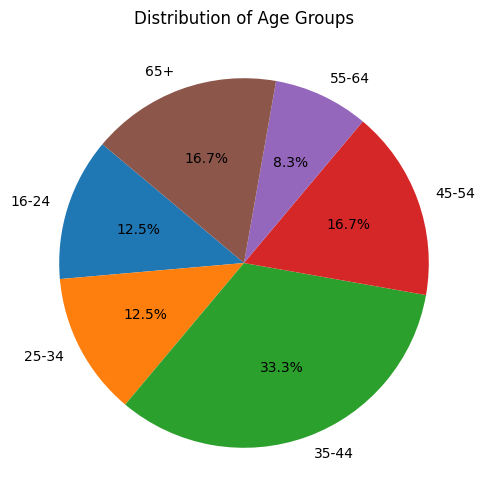

In [340]:
df_age = df_clean['age'].value_counts()

df_age = df_age.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_age, labels=df_age.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Age Groups')

plt.show()

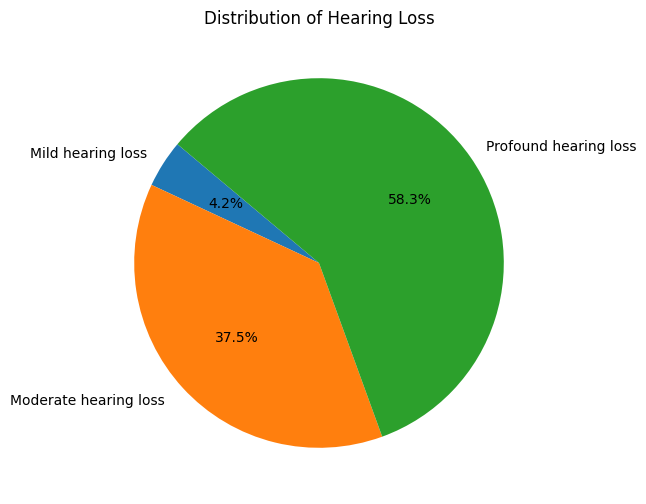

In [341]:
df_hearing = df_clean['hearing_loss'].value_counts()

df_hearing = df_hearing.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_hearing, labels=df_hearing.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Hearing Loss')

plt.show()

In [342]:
df_SUS = df_clean.iloc[:, 6:18]
df_SUS

,1,2,3,4,5,6,7,8,9,10,11,12
0,4,2,4,2,4,4,3,4,2,4,2,5
1,5,1,5,1,4,3,3,5,1,5,1,3
2,3,3,4,3,1,3,5,3,3,3,1,1
3,5,2,5,1,3,4,3,4,3,4,2,5
4,5,2,3,2,1,4,5,3,3,4,4,3
5,2,2,4,1,3,3,3,4,2,4,2,2
6,1,1,5,1,3,2,3,5,1,5,1,1
7,5,1,5,1,5,4,4,5,2,5,2,5
8,5,4,2,4,3,3,4,3,4,3,2,3
9,5,2,3,1,2,3,4,5,2,4,3,4


In [343]:
def calculate_row_score(row):
    score = 0
    for i, value in enumerate(row):
        if i in [0, 2, 4, 7, 5, 9, 11]:  # Columns 1, 3, 5, 8, 6, 10, 12
            score += value - 1
        elif i in [1, 3, 6, 8, 10]:  # Columns 2, 4, 7, 9, 11
            score += 5 - value
    score = score * 2.5
    return score

# Apply the scoring function to each row in the DataFrame
df_SUS['SUS Score'] = df_SUS.apply(calculate_row_score, axis=1)
average_sus_score = df_SUS['SUS Score'].mean()

print("Average SUS Score:", average_sus_score)
print(df_SUS)


Average SUS Score: 81.04166666666667
    1  2  3  4  5  6  7  8  9  10  11  12  SUS Score
0   4  2  4  2  4  4  3  4  2   4   2   5       90.0
1   5  1  5  1  4  3  3  5  1   5   1   3      102.5
2   3  3  4  3  1  3  5  3  3   3   1   1       52.5
3   5  2  5  1  3  4  3  4  3   4   2   5       92.5
4   5  2  3  2  1  4  5  3  3   4   4   3       62.5
5   2  2  4  1  3  3  3  4  2   4   2   2       75.0
6   1  1  5  1  3  2  3  5  1   5   1   1       82.5
7   5  1  5  1  5  4  4  5  2   5   2   5      105.0
8   5  4  2  4  3  3  4  3  4   3   2   3       55.0
9   5  2  3  1  2  3  4  5  2   4   3   4       80.0
10  5  1  5  1  5  3  2  5  1   5   1   5      112.5
11  5  2  4  2  2  3  4  4  1   4   2   4       82.5
12  5  3  5  1  5  5  3  4  1   5   2   4      102.5
13  4  3  3  2  2  4  3  2  3   3   3   4       65.0
14  4  2  5  2  3  4  1  3  3   5   1   5       95.0
15  5  2  4  2  3  4  2  2  2   3   1   4       85.0
16  3  2  3  1  4  3  3  2  4   3   4   3       62.5
17  5  1 

In [344]:
df_SUS_clean = df_clean.iloc[:, 6:18]
df_SUS_clean = df_SUS_clean.drop(['6','12'], axis=1)
df_SUS_clean

,1,2,3,4,5,7,8,9,10,11
0,4,2,4,2,4,3,4,2,4,2
1,5,1,5,1,4,3,5,1,5,1
2,3,3,4,3,1,5,3,3,3,1
3,5,2,5,1,3,3,4,3,4,2
4,5,2,3,2,1,5,3,3,4,4
5,2,2,4,1,3,3,4,2,4,2
6,1,1,5,1,3,3,5,1,5,1
7,5,1,5,1,5,4,5,2,5,2
8,5,4,2,4,3,4,3,4,3,2
9,5,2,3,1,2,4,5,2,4,3


In [345]:
def calculate_SUS_score(row):
    score = 0
    for i, value in enumerate(row):
        if i in [0,2,4,6,8]: # 1,3,5,7,and 9
            score += value - 1
        elif i in [1,2,5,7,9]: # 2,4,6,8 and 10
            score += 5 - value
    score = score * 2.5
    return score

# Apply the scoring function to each row in the DataFrame
df_SUS_clean['SUS Score'] = df_SUS_clean.apply(calculate_SUS_score, axis=1)
average_sus_clean_score = df_SUS_clean['SUS Score'].mean()

print("Average SUS Score:", average_sus_clean_score)
print(df_SUS_clean)


Average SUS Score: 59.6875
    1  2  3  4  5  7  8  9  10  11  SUS Score
0   4  2  4  2  4  3  4  2   4   2       65.0
1   5  1  5  1  4  3  5  1   5   1       82.5
2   3  3  4  3  1  5  3  3   3   1       42.5
3   5  2  5  1  3  3  4  3   4   2       65.0
4   5  2  3  2  1  5  3  3   4   4       42.5
5   2  2  4  1  3  3  4  2   4   2       57.5
6   1  1  5  1  3  3  5  1   5   1       70.0
7   5  1  5  1  5  4  5  2   5   2       77.5
8   5  4  2  4  3  4  3  4   3   2       42.5
9   5  2  3  1  2  4  5  2   4   3       57.5
10  5  1  5  1  5  2  5  1   5   1       87.5
11  5  2  4  2  2  4  4  1   4   2       62.5
12  5  3  5  1  5  3  4  1   5   2       75.0
13  4  3  3  2  2  3  2  3   3   3       42.5
14  4  2  5  2  3  1  3  3   5   1       70.0
15  5  2  4  2  3  2  2  2   3   1       62.5
16  3  2  3  1  4  3  2  4   3   4       42.5
17  5  1  1  1  4  3  4  1   5   4       62.5
18  5  5  2  1  4  3  2  4   4   4       40.0
19  5  4  4  1  3  5  3  1   4   4       50.0
20  5  

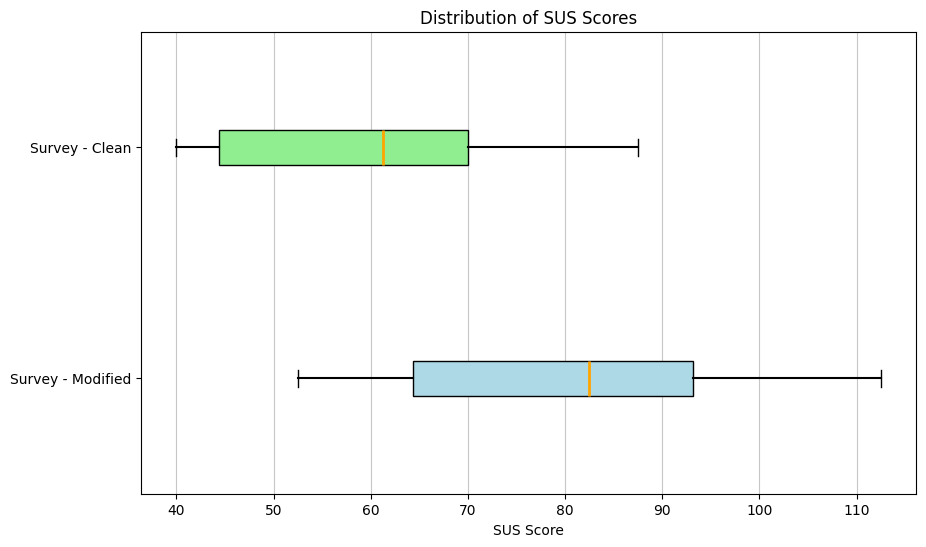

In [346]:
plt.figure(figsize=(10, 6))

plt.boxplot(df_SUS['SUS Score'], positions=[0], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

plt.boxplot(df_SUS_clean['SUS Score'], positions=[1], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Adjust x-axis labelss
plt.yticks([0, 1], ['Survey - Modified', 'Survey - Clean'])

# Set labels and title
plt.xlabel('SUS Score')
plt.title('Distribution of SUS Scores')
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()


# Age 

33.3% aged 35-44

# Hearing Loss

58.3% with profound hearing loss

# SUS Score

Average SUS Score: 81.04166666666667

# Please provide any other insights regarding assistive technology and their usability. 

I am hearing impaired and can speak clearly however cannot hear very well at all on phone conversation... I have tried all the transcribe apps I know about and most are inaccurate ... I have had to give up my job as I cannot do a phonecall as I know of no current accurate phonecall transcribe at present while on a call.

The questions are too generic, not reflective of different technologies

Whole assistive technology is available, and easily usable, I think you're missing the point. Why should Deaf people communicate in our second language, but hearing people's first language, when hearing people can't be bothered to learn our first language? Why do hearing people, such as yourself, assume Dead people want to communicate in English? Why do hearing people assume that Deaf people want solutions and fixes, when we do not have problems that needs fixing? This technology does exist to aid the Deaf person, it exists to aid the hearing person communicate with us. Read up on audism.

Theblacknof interface between hearing aids and Roger and oticon devices is really frustrating.

I don’t know if this is exactly what you are looking for… But given the vagary of the prompts: 1. Specifically relating to hearing aids, they are often far too vulnerable to moisture and frequently result in a staggered And ‘flow’ breaking Routines of having to frequently remove the hearing aids to tell them off/Wick away moisture around the earpiece/frequently making adjustments… (Imagine being in a meeting and frequently having to covertly remove your hearing aids to towel off the hearing aid while the meeting proceeds and sneak it back in and having to repeat that several times) 2. The exact industry term for this is escaping me, but, that “sound dampening protective thing“ where a computer tries to protect my hearing on my behalf and causes the volume to dip… Which I understand can be a fantastic feature for many folks… But for a hearing aid power user that began my journey in the 80s with analog hearing aids that just amplified everything and if I wanted to turn the volume down because of a loud noise I would mainly do so… So I would be fantastic if there’s a way that advanced users could toggle this feature off… I can’t play the piano anymore because the damn thing keeps behaving like a child that’s playing with the volume button turning it up and down… Or if I’m in a social setting and somebody lets up a high pitch squeal of excitement… Results in my hearing aids giving me a muted the sound for a minute by the computers trying to figure out when it’s safe to turn the volume back up. How do you spoken to a couple audiologist about these issues and they shrugged that most hearing aids are essentially made for geriatric populations that have to be reminded to wear their hearing aids… Not for younger folks who essentially wear them from the very beginning of the day up until they are in bed… I just wish that more assistive technologies kept younger demographics in mind. And I wish to have features that perhaps could be enabled by an audiologist that could allow a more advanced user to toggle on and off certain features that are built-in (including that weird silence followed by a series of beeps so you’re not “startled by the hearing a turning on“… I miss the hearing aid that she has turn on when you flip a switch) Perhaps because the deaf community (I should say lowercase deaf, That do not sign) especially amongst younger demographics are essentially defeated with a world full of bad broken captions and hearing aids that are definitely not made for them… That it’s easy to forget that we exist but I would be interested to know what the actual demographic percentage that we do make up of potential hearing aid users

I am a teacher of deaf children who use their assistive technology very easily. They also connect to a Roger system to reduce background noise. Children as young as 4 are taught to clean, check batteries (if required) and let an adult know if their battery is flat, and then change the battery themselves. They become very independent with their use. That is with both cochlear implants and hearing aids.

The issue I have is that my hearing aids stream phone and tv very well but I can’t stream zoom which I do all day for my job.

More work needs to be done for assistive technology, such as the possibility of not needing to use wifi in locations where wifi may not be possible.

Often, I need more than hearing aids alone to communicate. Assistive devices add the quality to my life. I use them every day.

technology is not a panacea I'm still deaf. I need a total communication approach

I think the major downfalls of today's current assistive technology for D/Hoh is the lack of training by medical professionals on both how to use it as well as the financial supports. As a min wage employee my hearing aids were $3300 Canadian and that was AFTER the $1000 accessible devices program grant. I am currently looking at upgrading my mic to a Roger on which is a $2600 device which i will receive a $1300 grant from the government of Ontario.

I’m 88 years old and have recently lost my hearing completely. I cannot sign nor text ( daughter texting for me now ) but I can operate ‘luve transcribe’ and it is my lifeline to any communication at all . Live transcribe is good value but does not work well in public places nor where there’s a lot of background noise . I cannot operate a mobile phone but use an iPad. Without live transcribe I would have to rely on lip reading and I’m not great at that . If you have any ideas to help me connect with the world I would be very grateful because it’s very lonely not being able to have a conversation with hearing people nor any deaf people! ( because they can’t speak into my transcribe ) . Many thanks .

Brands vary alot between useful and boring - Sarabec for example bad design. Beige colours and looks like for old people, which i am not. But others more modern like Bellman & Symfon, less embarassing to use and very easy.

In [45]:
columns = {'Start time':'start','Completion time':'end','Age':'age',
           'What is your level of hearing loss?':'hearing_loss','On what device are you accessing the web app?':'tech',
           'The speech-to-text feature felt intuitive in terms of usability.':'STT-1',
           'The system accurately transcribed the spoken conversation.':'STT-2',
           'The speech-to-text feature felt comfortable to read during conversation.':'STT-3',
           'Were there any challenges or issues you encountered during the speech-to-text process?':'STT-4',

           'The speech-to-text with text-to-speech felt intuitive in terms of usability.':'STT-TTS-1',
           'The generated text effectively transformed back into speech.':'STT-TTS-2',
           'The text-to-speech felt comfortable to listen to during conversation.':'STT-TTS-3',
           'Did you encounter any discrepancies or errors in the conversion process?':'STT-TTS-4',

           'The playback feature felt intuitive in terms of usability.':'PB-1',
           'The system provided clear and accurate audio playback.':'PB-2',
           'The audio playback feature felt comfortable to use during conversation.':'PB-3',
           'Were there any challenges or issues encountered during the playback task?':'PB-4',

           'Making an account felt intuitive in terms of usability.':'ACC-1',
           'Saving instances felt intuitive in terms of usability.':'ACC-2',
           'Saving instances felt comfortable to do.':'ACC-3',
           'Were there any challenges or issues encountered during the sign-up and saving task?':'ACC-4',
           
           'The text-to-speech felt intuitive in terms of usability.':'TTS-1',
           'The system produced clear and natural-sounding speech from the input text.':'TTS-2',
           'The text-to-speech felt comfortable to use during conversation.':'TTS-3',
           'Were there any challenges or areas of improvement identified during the text-to-speech task?':'TTS-5',

           'Completing the next task is optional and will require just a few more minutes. Would you like to proceed with the following questions?':'DROP',

           'I think that I would like to use this web-app frequently':'1',
           'I found the web-app unnecessarily complex':'2',
           'I thought the web-app was easy to use':'3',
           'I found the web-app’s design to be intuitive and user-friendly ':'4',
           'I think that I would need the support of a technical person to be able to use this web-app':'5',
           'I found the various functions in this web-app were well integrated':'6',
           'I found the various functions in this web-app were well centralised to direct attention to vital information':'7',
           'I thought the colours of the web-app contributes to a comfortable interaction':'8',
           'I thought the varying font sizes for text boxes enhanced readability, especially for potential users from the elderly demographic':'9',
           'I found the error communications and user guide of the web-app to be an effective user-system communication':'10',
           'I found the default settings helpful in streamlining your initial interaction with the web-app':'11',
           'I thought there was too much inconsistency in this web-app':'12',
           'I would imagine that most people would learn to use this web-app very quickly':'13',
           'I found the web-app very cumbersome to use':'14',
           'I felt very confident using the web-app':'15',
           'I needed to learn a lot of things before I could get going with the web-app':'16',
           'I think this web-app will be useful in providing solutions for the Deaf and Hard-of-Hearing community':'17',

           'Do you have any other comments for improvement/future work for the web-app?':'FUTURE'
}

mappings = {
    'Strongly Agree' : 5,
    'Agree' : 4,
    'Neutral': 3,
    'Disagree' : 2,
    'Strongly Disagree' : 1,
}

df_eval = pd.read_csv('../raw/data-3.csv')
df_eval_clean = df_eval
df_eval_clean.rename(columns=columns, inplace=True)
df_eval_clean = df_eval_clean.drop(['Name'], axis=1)
df_eval_clean = df_eval_clean.drop(['Email'], axis=1)
df_eval_clean = df_eval_clean.drop(['Last modified time'], axis=1)
df_eval_clean = df_eval_clean.drop(['DROP'], axis=1)
df_eval_clean.head()

,ID,start,end,age,hearing_loss,tech,STT-1,STT-2,STT-3,STT-4,...,9,10,11,12,13,14,15,16,17,FUTURE
0,1,2/16/24 17:28:10,2/16/24 17:58:16,16-24,No hearing loss,Laptop,Agree,Agree,Strongly agree,no apparent issues,...,5.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,5.0,I think it may be useful to combine the speech...
1,2,2/19/24 13:35:28,2/19/24 13:43:44,45-54,Mild hearing loss,Laptop,Strongly agree,Agree,Agree,NaN,...,5.0,5.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,NaN
2,3,2/24/24 14:37:53,2/24/24 14:55:38,16-24,No hearing loss,Laptop,Strongly agree,Agree,Strongly agree,It didn't seem to work on the browser I was us...,...,5.0,4.0,3.0,2.0,4.0,1.0,3.0,3.0,4.0,NaN
3,4,2/27/24 11:47:26,2/27/24 12:03:00,16-24,No hearing loss,Laptop,Strongly agree,Strongly agree,Agree,NaN,...,5.0,5.0,5.0,1.0,4.0,2.0,5.0,1.0,5.0,NaN
4,5,2/28/24 12:53:41,2/28/24 12:57:54,35-44,Profound hearing loss,Desktop,Strongly agree,Strongly agree,Agree,none,...,5.0,4.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,NaN


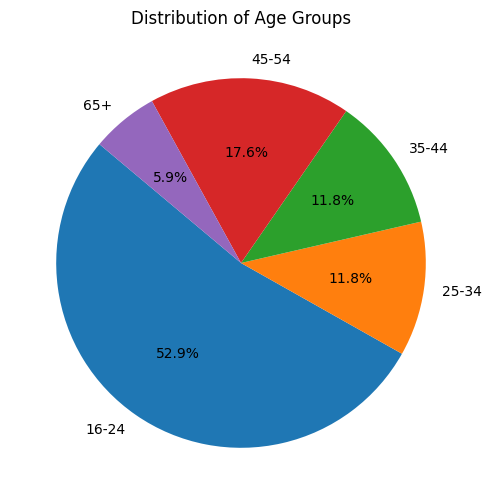

In [46]:
df_age = df_eval_clean['age'].value_counts()

df_age = df_age.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_age, labels=df_age.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Age Groups')

plt.show()

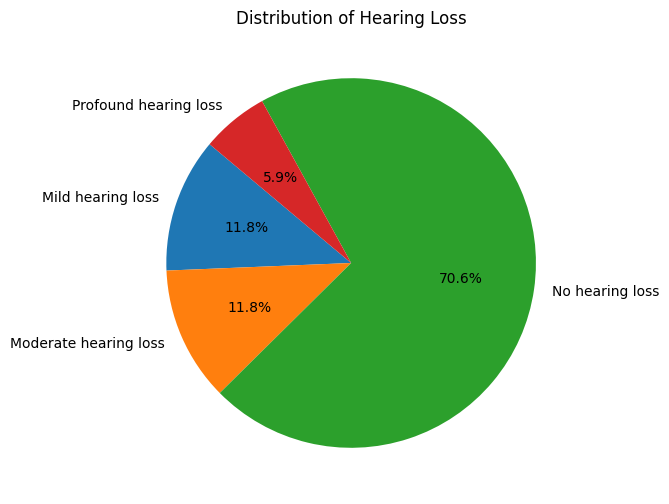

In [47]:
df_hearing = df_eval_clean['hearing_loss'].value_counts()

df_hearing = df_hearing.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_hearing, labels=df_hearing.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Hearing Loss')

plt.show()

In [48]:

df_STT = df_eval_clean[['hearing_loss','STT-1', 'STT-2', 'STT-3']]

df_no_hearing_loss = df_STT[df_STT['hearing_loss'] == 'No hearing loss']
df_no_hearing_loss = df_no_hearing_loss.drop(columns=['hearing_loss'])

df_other_hearing_loss = df_STT[df_STT['hearing_loss'] != 'No hearing loss']
df_other_hearing_loss = df_other_hearing_loss.drop(columns=['hearing_loss'])


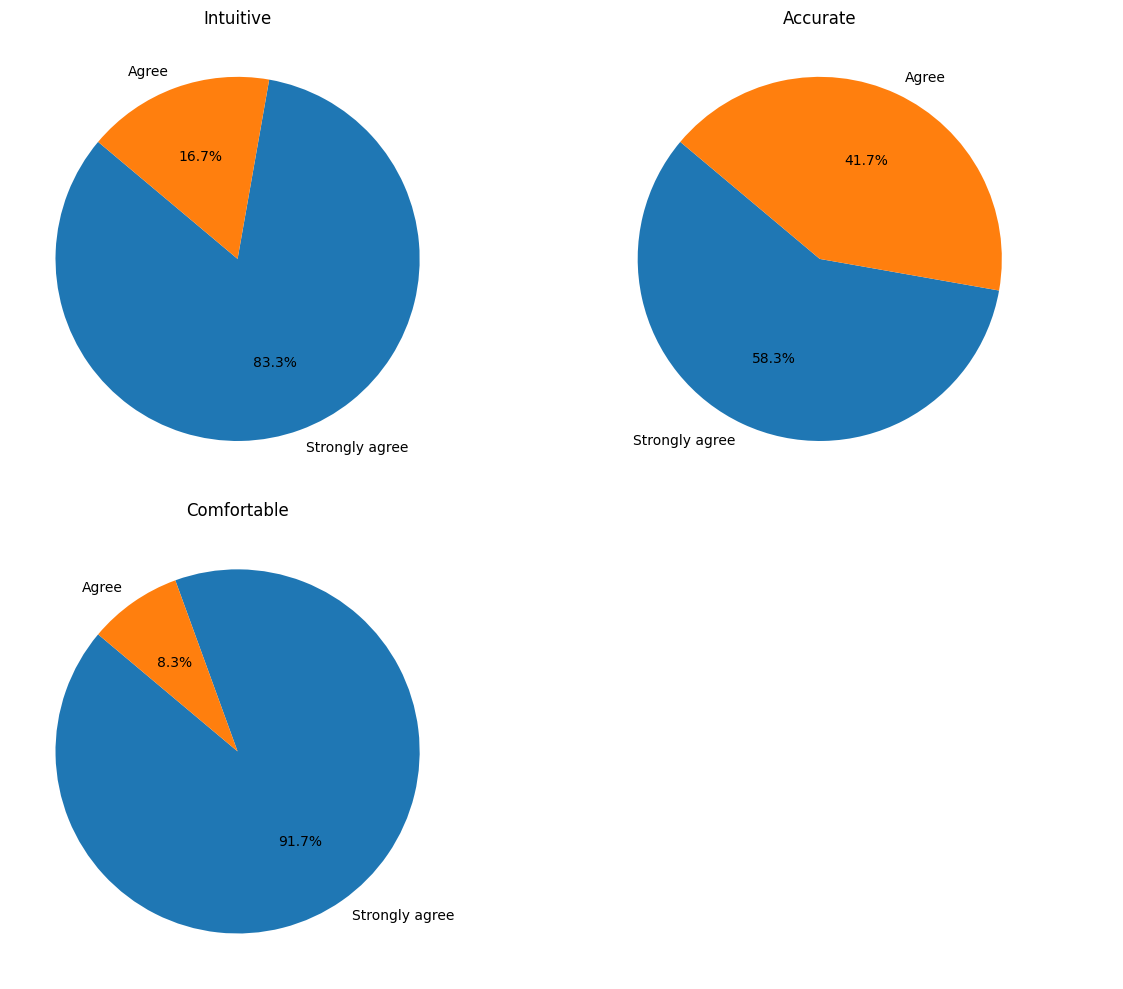

In [49]:
df_STT_1_hearing = df_no_hearing_loss['STT-1']
df_STT_2_hearing = df_no_hearing_loss['STT-2']
df_STT_3_hearing = df_no_hearing_loss['STT-3']

df_STT_1_hearing_counts = df_STT_1_hearing.value_counts()
df_STT_2_hearing_counts = df_STT_2_hearing.value_counts()
df_STT_3_hearing_counts = df_STT_3_hearing.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_STT_1_hearing_counts, labels=df_STT_1_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_STT_2_hearing_counts, labels=df_STT_2_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_STT_3_hearing_counts, labels=df_STT_3_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

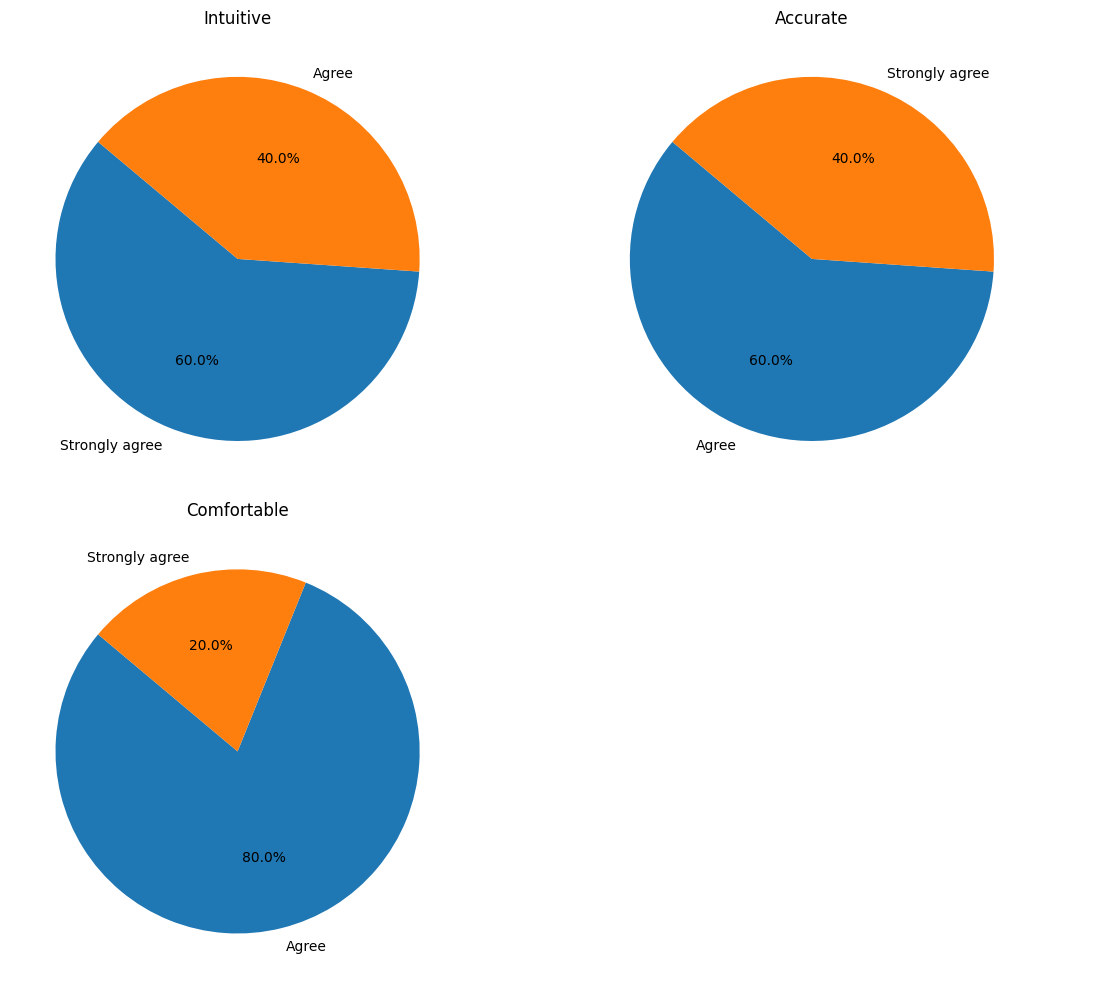

In [50]:
df_STT_1_deaf = df_other_hearing_loss['STT-1']
df_STT_2_deaf = df_other_hearing_loss['STT-2']
df_STT_3_deaf = df_other_hearing_loss['STT-3']

df_STT_1_deaf_counts = df_STT_1_deaf.value_counts()
df_STT_2_deaf_counts = df_STT_2_deaf.value_counts()
df_STT_3_deaf_counts = df_STT_3_deaf.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_STT_1_deaf_counts, labels=df_STT_1_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_STT_2_deaf_counts, labels=df_STT_2_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_STT_3_deaf_counts, labels=df_STT_3_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Were there any challenges or issues you encountered during the speech-to-text process?

It didn't seem to work on the browser I was using (Arc), so I had to switch to chrome, but that might just be an issue with my browser.

Not always 100% accurate in transcribing possible to due strong Yorkshire accent

Where it said 'Start Microphone': the position caught me off guard at first - I was thinking at first it would be next to the 'Start Listening' button. That was only real issue I faced, otherwise it was very simple to understand.

it had a hard time understanding when I used an acronym that was spelled out. I tried 'LOL' and it thought I said 'hello', Eventually I got it to recognise the acronym.

In [51]:

df_STT_TTS = df_eval_clean[['hearing_loss','STT-TTS-1', 'STT-TTS-2', 'STT-TTS-3']]

df_no_hearing_loss = df_STT_TTS[df_STT_TTS['hearing_loss'] == 'No hearing loss']
df_no_hearing_loss = df_no_hearing_loss.drop(columns=['hearing_loss'])

df_other_hearing_loss = df_STT_TTS[df_STT_TTS['hearing_loss'] != 'No hearing loss']
df_other_hearing_loss = df_other_hearing_loss.drop(columns=['hearing_loss'])


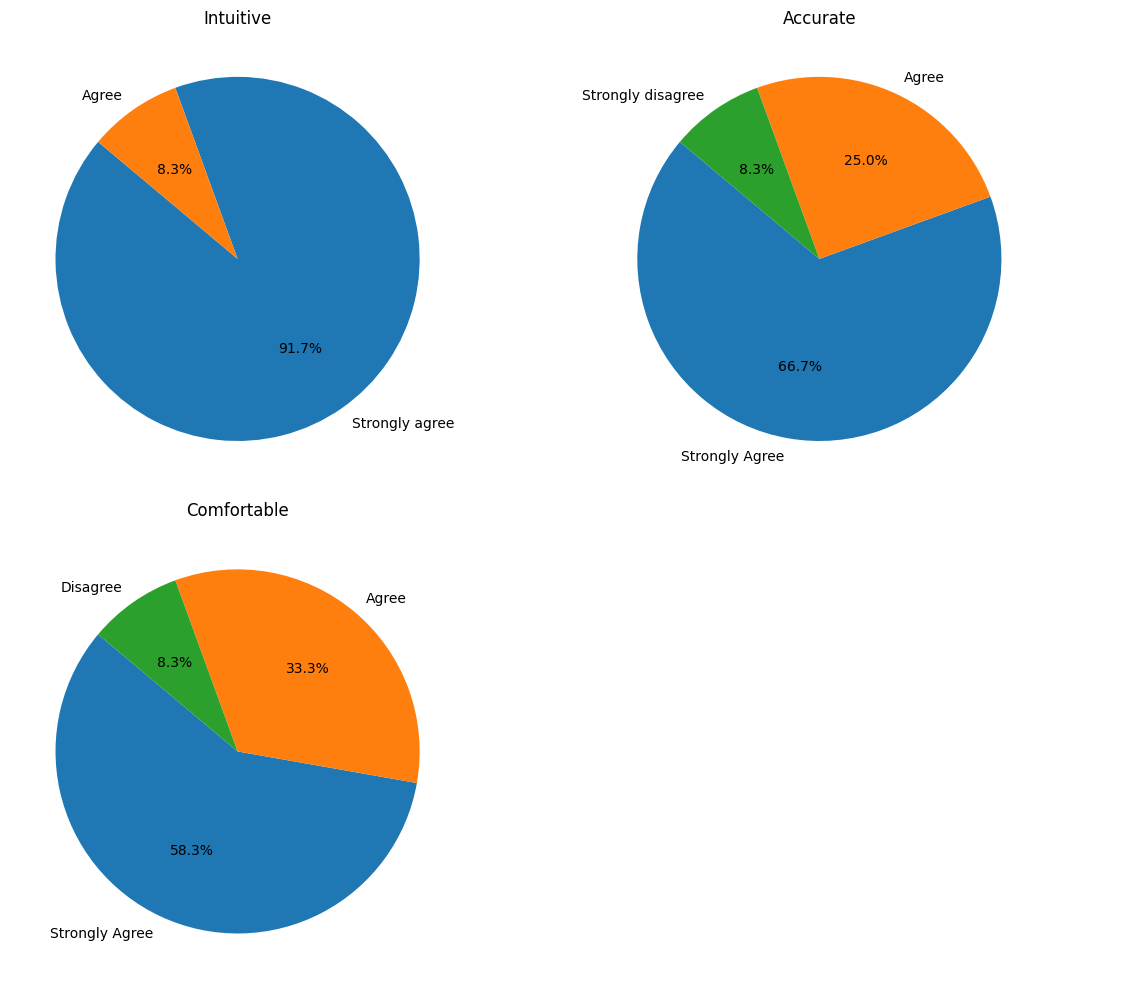

In [52]:
df_STT_TSS_1_hearing = df_no_hearing_loss['STT-TTS-1']
df_STT_TSS_2_hearing = df_no_hearing_loss['STT-TTS-2']
df_STT_TSS_3_hearing = df_no_hearing_loss['STT-TTS-3']

df_STT_TSS_1_hearing_counts = df_STT_TSS_1_hearing.value_counts()
df_STT_TSS_2_hearing_counts = df_STT_TSS_2_hearing.value_counts()
df_STT_TSS_3_hearing_counts = df_STT_TSS_3_hearing.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_STT_TSS_1_hearing_counts, labels=df_STT_TSS_1_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_STT_TSS_2_hearing_counts, labels=df_STT_TSS_2_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_STT_TSS_3_hearing_counts, labels=df_STT_TSS_3_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

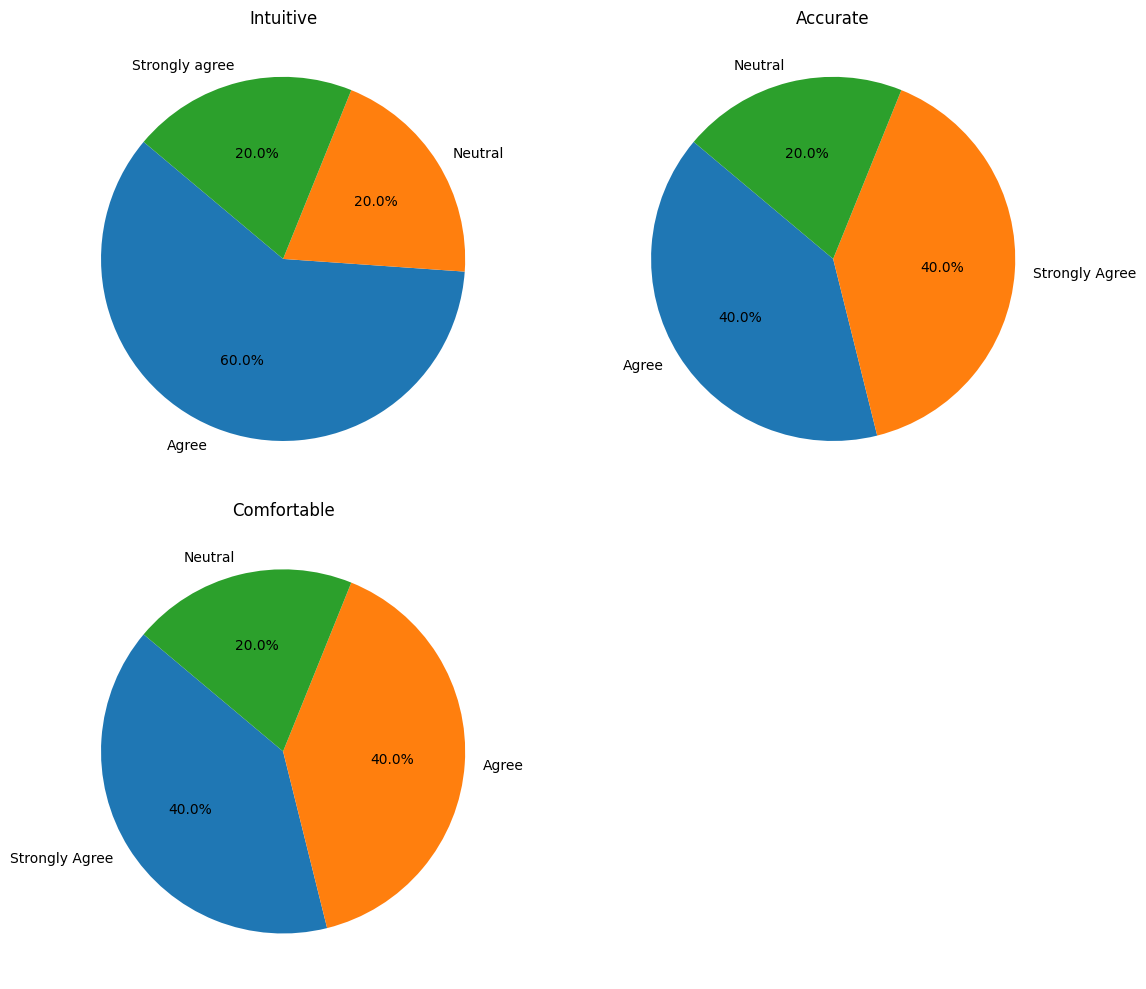

In [53]:
df_STT_TTS_1_deaf = df_other_hearing_loss['STT-TTS-1']
df_STT_TTS_2_deaf = df_other_hearing_loss['STT-TTS-2']
df_STT_TTS_3_deaf = df_other_hearing_loss['STT-TTS-3']

df_STT_TTS_1_deaf_counts = df_STT_TTS_1_deaf.value_counts()
df_STT_TTS_2_deaf_counts = df_STT_TTS_2_deaf.value_counts()
df_STT_TTS_3_deaf_counts = df_STT_TTS_3_deaf.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_STT_TTS_1_deaf_counts, labels=df_STT_TTS_1_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_STT_TTS_2_deaf_counts, labels=df_STT_TTS_2_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_STT_TTS_3_deaf_counts, labels=df_STT_TTS_3_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Did you encounter any discrepancies or errors in the conversion process?

the speech-to-text transcribed much more accurately when the microphone was connected physically to the device by a wire, as opposed to when it was connected over bluetooth.

If I set the language of the text to speech before starting to record, it would revert back to the original language, which got a bit tedious when trying to record and listen to text in another language

As my PC's language is set to German, the application automatically chose a German TTS voice. When i tried to change this, the old voice kept reading the full text before the new voice started anew. I believe it would be helpful that the TTS voice selected by default be aligned with the language selected above.

i think the flip switch can be explained a bit better

Slight errors

No errors in actually reading it back, though it is a bit choppy, and doesn't feel like normal conversation.

In [54]:

df_PB = df_eval_clean[['hearing_loss','PB-1', 'PB-2', 'PB-3']]

df_no_hearing_loss = df_PB[df_PB['hearing_loss'] == 'No hearing loss']
df_no_hearing_loss = df_no_hearing_loss.drop(columns=['hearing_loss'])

df_other_hearing_loss = df_PB[df_PB['hearing_loss'] != 'No hearing loss']
df_other_hearing_loss = df_other_hearing_loss.drop(columns=['hearing_loss'])


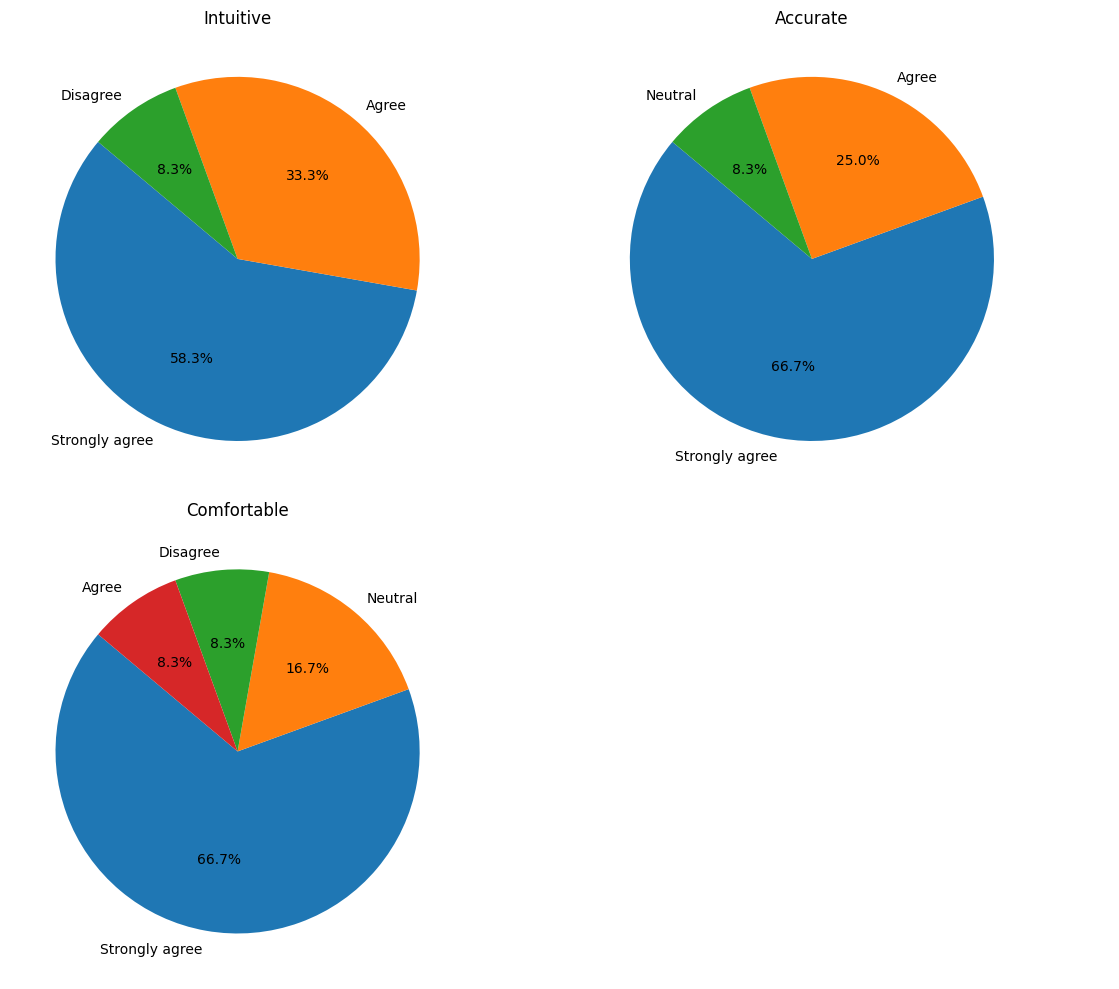

In [55]:
df_PB_1_hearing = df_no_hearing_loss['PB-1']
df_PB_2_hearing = df_no_hearing_loss['PB-2']
df_PB_3_hearing = df_no_hearing_loss['PB-3']

df_PB_1_hearing_counts = df_PB_1_hearing.value_counts()
df_PB_2_hearing_counts = df_PB_2_hearing.value_counts()
df_PB_3_hearing_counts = df_PB_3_hearing.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_PB_1_hearing_counts, labels=df_PB_1_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_PB_2_hearing_counts, labels=df_PB_2_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_PB_3_hearing_counts, labels=df_PB_3_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

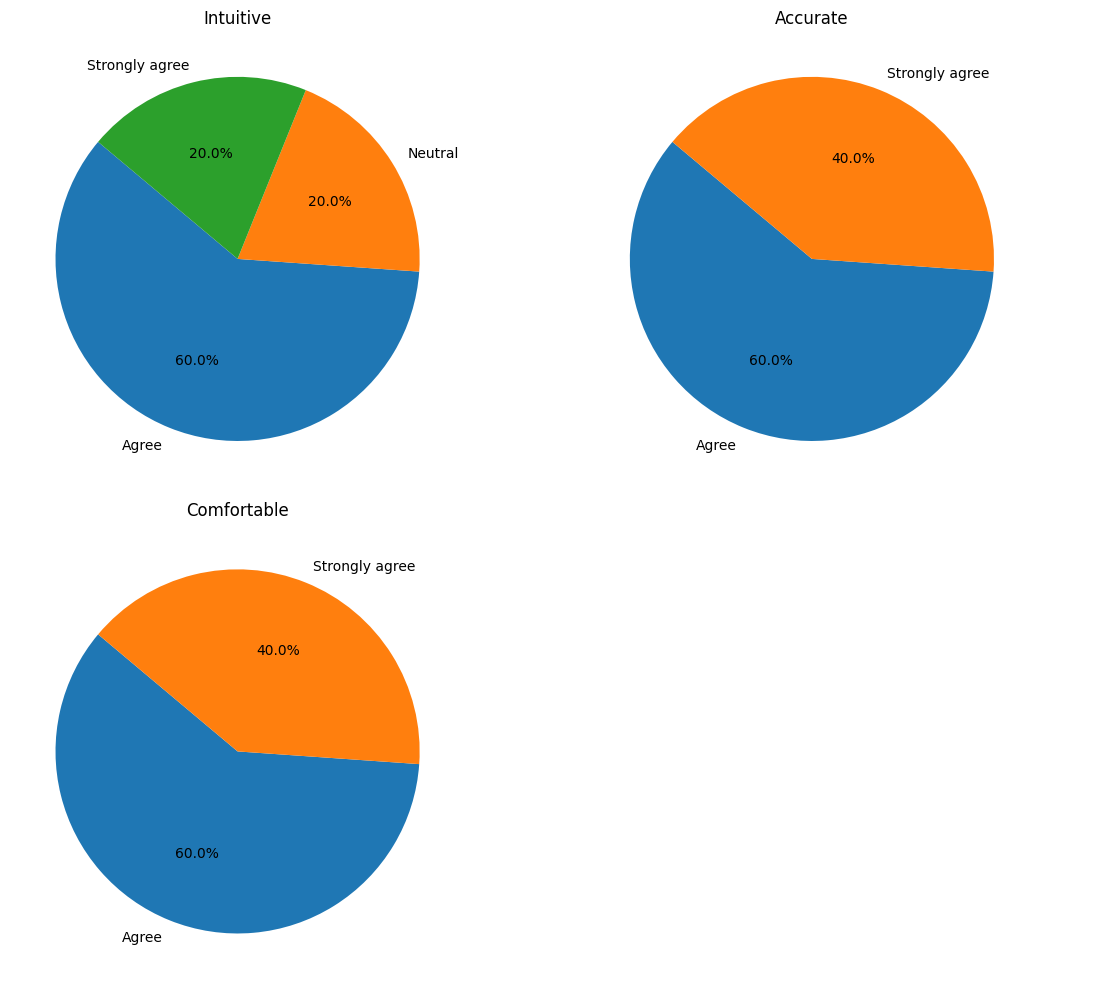

In [56]:
df_PB_1_deaf = df_other_hearing_loss['PB-1']
df_PB_2_deaf = df_other_hearing_loss['PB-2']
df_PB_3_deaf = df_other_hearing_loss['PB-3']

df_PB_1_deaf_counts = df_PB_1_deaf.value_counts()
df_PB_2_deaf_counts = df_PB_2_deaf.value_counts()
df_PB_3_deaf_counts = df_PB_3_deaf.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_PB_1_deaf_counts, labels=df_PB_1_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_PB_2_deaf_counts, labels=df_PB_2_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_PB_3_deaf_counts, labels=df_PB_3_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Were there any challenges or issues encountered during the playback task?

i didn't know that I could click on the cog in the top right corner to get descriptions of the terms. Though even then, I didn't really understand how changing factors such as the frequency or Q would affect the playback.

Some of the saved trigger words weren't getting detected as well so it wouldn't always change to that particular saved configuration. It worked using the word "stop" as a trigger, but not using the word "passthrough"

Error miss heard some words

It was really easy to use: maybe one thing which have could have made this even better might be a toolbar that briefly explains what the different properties mean when hovered over.

There is a lot of things to fiddle with, which is useful for usability, but can be confusing. I just ignored some options after fiddling with them once.

In [59]:

df_ACC = df_eval_clean[['hearing_loss','ACC-1', 'ACC-2', 'ACC-3']]

df_no_hearing_loss = df_ACC[df_ACC['hearing_loss'] == 'No hearing loss']
df_no_hearing_loss = df_no_hearing_loss.drop(columns=['hearing_loss'])

df_other_hearing_loss = df_ACC[df_ACC['hearing_loss'] != 'No hearing loss']
df_other_hearing_loss = df_other_hearing_loss.drop(columns=['hearing_loss'])


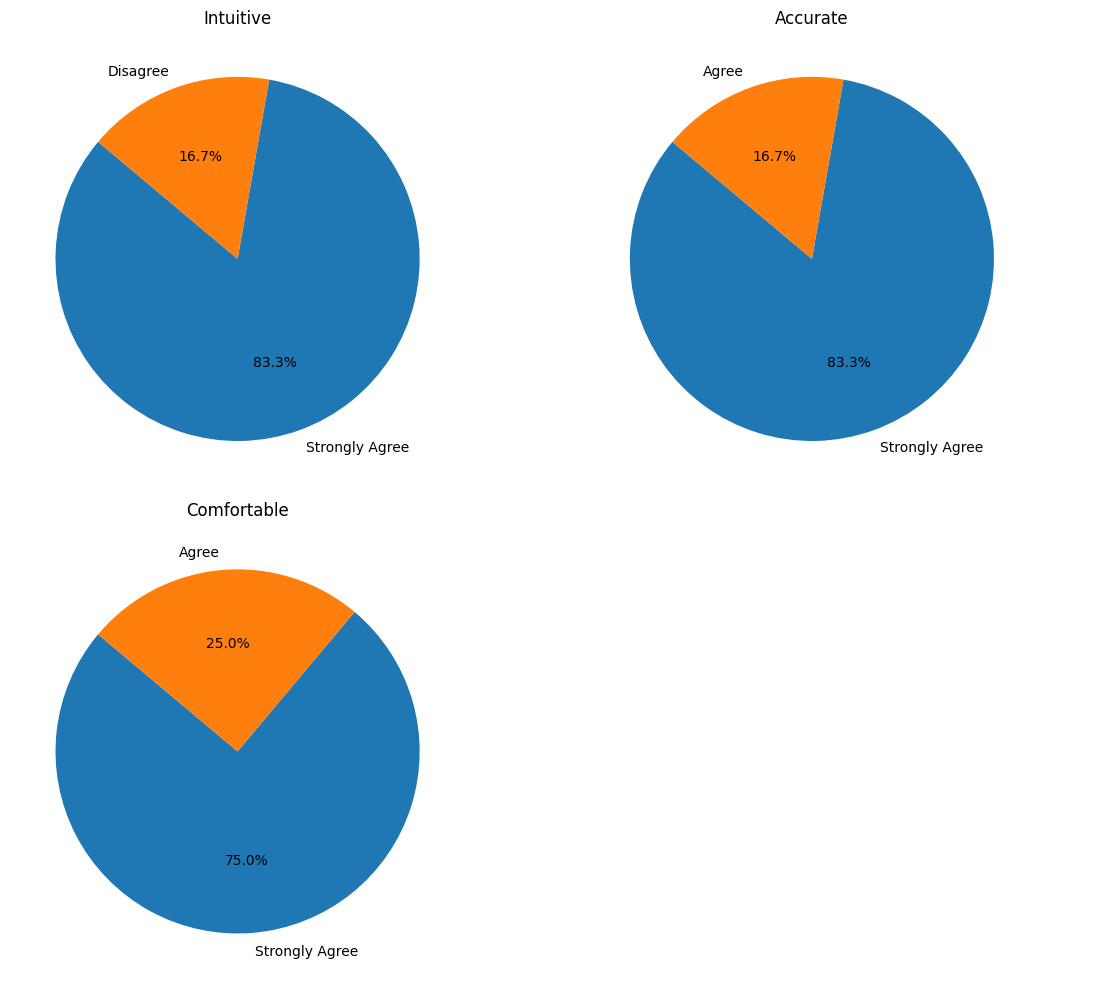

In [60]:
df_ACC_1_hearing = df_no_hearing_loss['ACC-1']
df_ACC_2_hearing = df_no_hearing_loss['ACC-2']
df_ACC_3_hearing = df_no_hearing_loss['ACC-3']

df_ACC_1_hearing_counts = df_ACC_1_hearing.value_counts()
df_ACC_2_hearing_counts = df_ACC_2_hearing.value_counts()
df_ACC_3_hearing_counts = df_ACC_3_hearing.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_ACC_1_hearing_counts, labels=df_ACC_1_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive - Account')

axs[0, 1].pie(df_ACC_2_hearing_counts, labels=df_ACC_2_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Intuitive- Saves')

axs[1, 0].pie(df_ACC_3_hearing_counts, labels=df_ACC_3_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

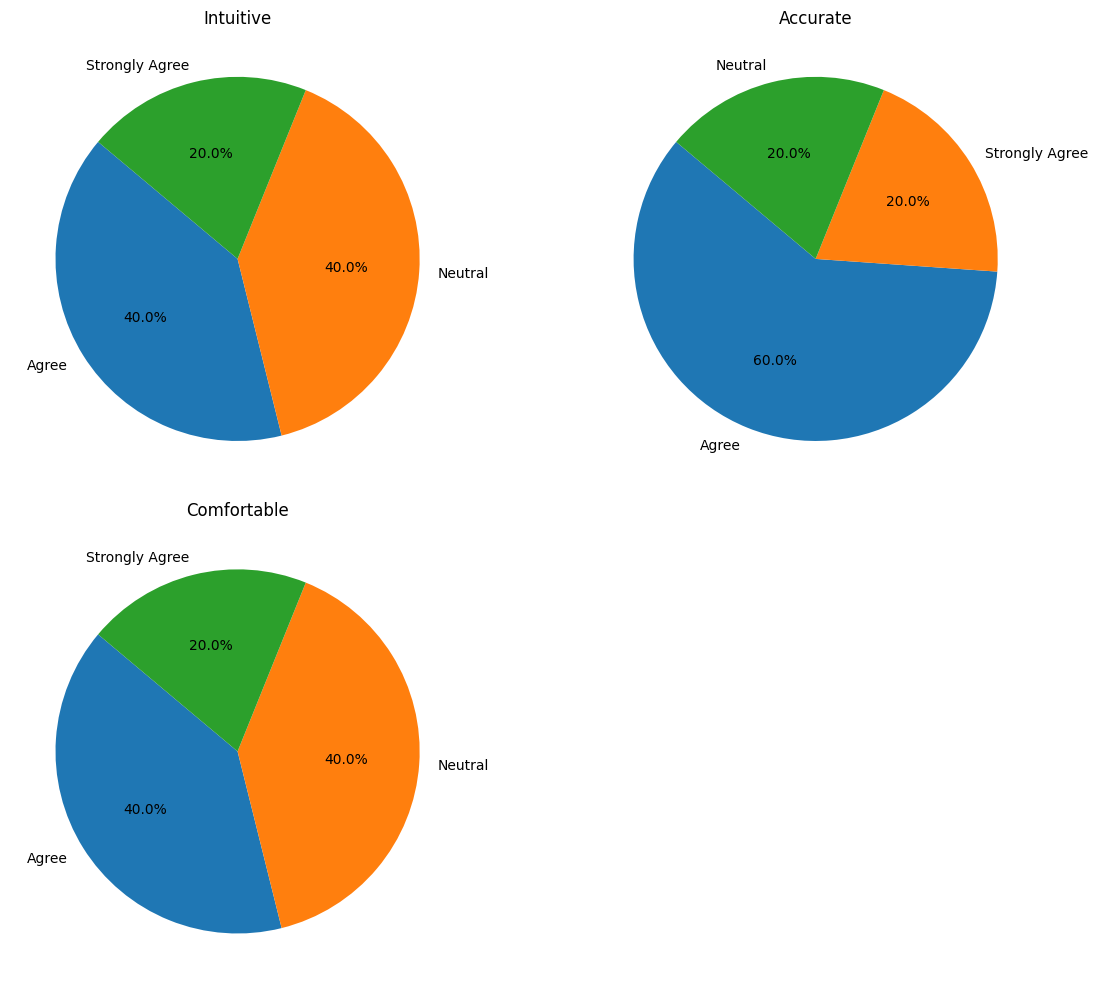

In [61]:
df_ACC_1_deaf = df_other_hearing_loss['ACC-1']
df_ACC_2_deaf = df_other_hearing_loss['ACC-2']
df_ACC_3_deaf = df_other_hearing_loss['ACC-3']

df_ACC_1_deaf_counts = df_ACC_1_deaf.value_counts()
df_ACC_2_deaf_counts = df_ACC_2_deaf.value_counts()
df_ACC_3_deaf_counts = df_ACC_3_deaf.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_ACC_1_deaf_counts, labels=df_ACC_1_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_ACC_2_deaf_counts, labels=df_ACC_2_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_ACC_3_deaf_counts, labels=df_ACC_3_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Were there any challenges or issues encountered during the sign-up and saving task?

Not a challenge per se, but I did notice that when saving a setting with a default value for one of the configuration options, the corresponding cell in the table would be empty, which I found confusing at first.

there is no direct sign up button

What might improve the design is if a change is made to the default or currently used preset, then the save button changes colour or shows an asterisk to inform that changes have been made which might like to be saved (to avoid forgetting)

I'm not sure what the trigger word means. I also am locked into my last saved setting, when I go to the dropdown menu and click on my first saved setting it won't register.

In [64]:

df_TTS = df_eval_clean[['hearing_loss','TTS-1', 'TTS-2', 'TTS-3']]

df_no_hearing_loss = df_TTS[df_TTS['hearing_loss'] == 'No hearing loss']
df_no_hearing_loss = df_no_hearing_loss.drop(columns=['hearing_loss'])

df_other_hearing_loss = df_TTS[df_TTS['hearing_loss'] != 'No hearing loss']
df_other_hearing_loss = df_other_hearing_loss.drop(columns=['hearing_loss'])


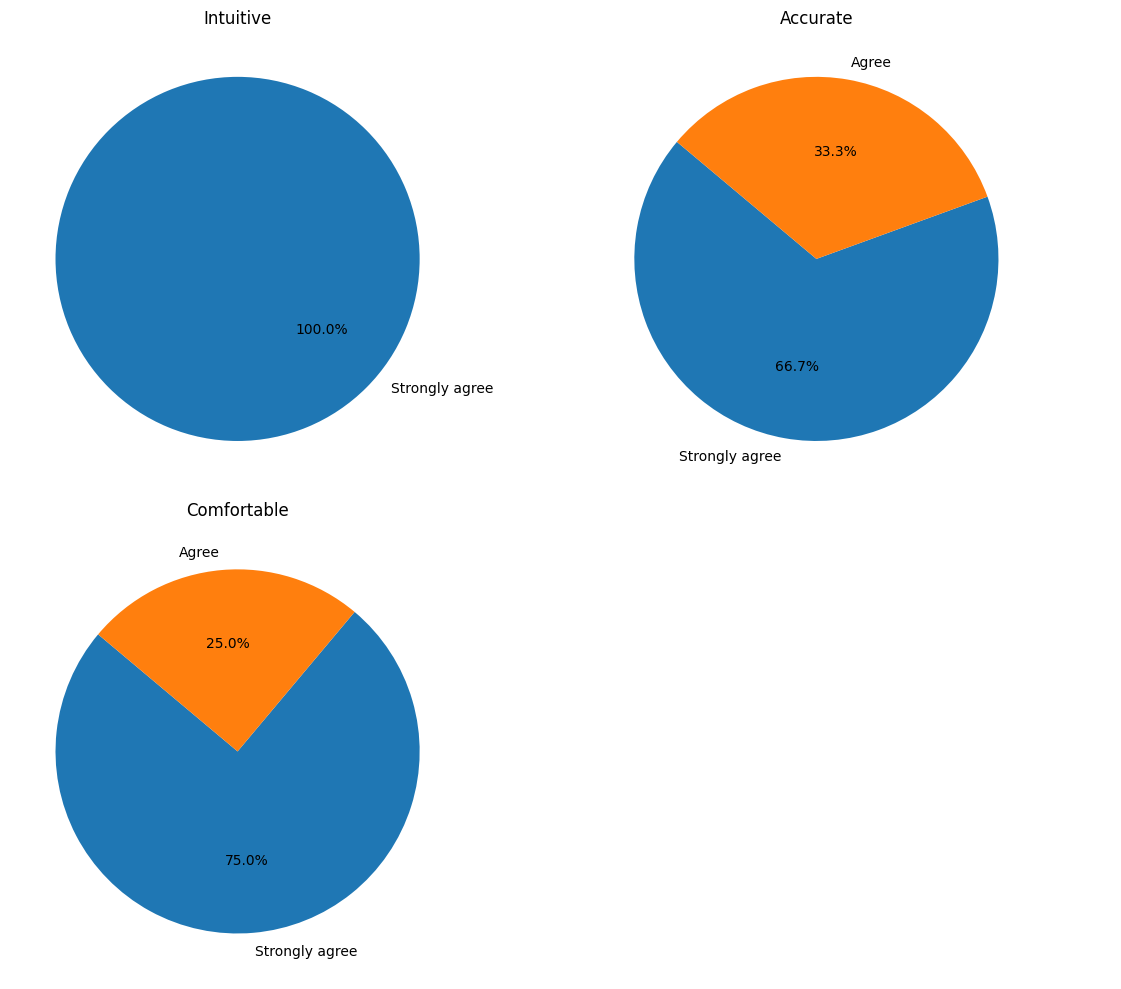

In [65]:
df_TTS_1_hearing = df_no_hearing_loss['TTS-1']
df_TTS_2_hearing = df_no_hearing_loss['TTS-2']
df_TTS_3_hearing = df_no_hearing_loss['TTS-3']

df_TTS_1_hearing_counts = df_TTS_1_hearing.value_counts()
df_TTS_2_hearing_counts = df_TTS_2_hearing.value_counts()
df_TTS_3_hearing_counts = df_TTS_3_hearing.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_TTS_1_hearing_counts, labels=df_TTS_1_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_TTS_2_hearing_counts, labels=df_TTS_2_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_TTS_3_hearing_counts, labels=df_TTS_3_hearing_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

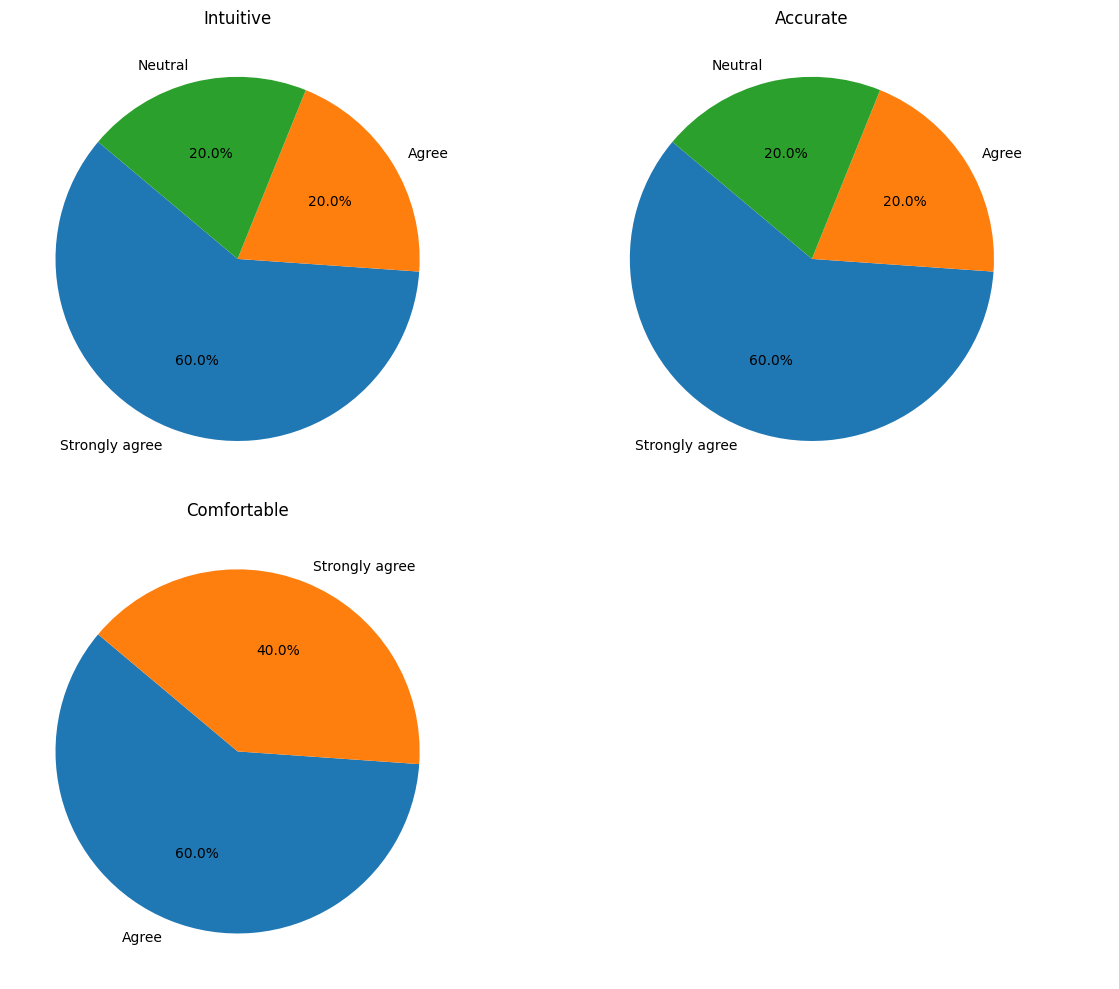

In [66]:
df_TTS_1_deaf = df_other_hearing_loss['TTS-1']
df_TTS_2_deaf = df_other_hearing_loss['TTS-2']
df_TTS_3_deaf = df_other_hearing_loss['TTS-3']

df_TTS_1_deaf_counts = df_TTS_1_deaf.value_counts()
df_TTS_2_deaf_counts = df_TTS_2_deaf.value_counts()
df_TTS_3_deaf_counts = df_TTS_3_deaf.value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].pie(df_TTS_1_deaf_counts, labels=df_TTS_1_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Intuitive')

axs[0, 1].pie(df_TTS_2_deaf_counts, labels=df_TTS_2_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Accurate')

axs[1, 0].pie(df_TTS_3_deaf_counts, labels=df_TTS_3_deaf_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Comfortable')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Were there any challenges or areas of improvement identified during the text-to-speech task?

It would be great if I could save a configuration for the text to speech also

ways to vary speech

This task was very easy. What might help is to have a button that plays an example dialogue on repeat and users can adjust the sliders to tweak for their optimal settings

still just a bit choppy, as in I know it is a robotic voice.

In [272]:
df_last = df_eval_clean.iloc[:, 26:43]
df_deaf = df_eval_clean['hearing_loss']
combined_df = pd.concat([df_last, df_deaf], axis=1)

df_deaf = combined_df[combined_df['hearing_loss'] != 'No hearing loss']
df_deaf = df_deaf.drop(columns=['hearing_loss'])
df_deaf = df_deaf.dropna()

column_averages = df_deaf.mean(axis=0)

df_deaf.loc['totals'] = column_averages

totals_deaf = df_deaf.loc['totals']

print(totals_deaf)

1     3.25
2     1.75
3     4.00
4     4.00
5     1.50
6     4.25
7     4.25
8     4.00
9     4.25
10    3.75
11    4.25
12    1.50
13    4.50
14    1.75
15    4.00
16    2.00
17    4.00
Name: totals, dtype: float64


In [273]:
# Convert the values to numeric type
totals_deaf = totals_deaf.astype(float)

# Subtraction from specific rows
subtract_rows = [0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 16]
totals_deaf.iloc[subtract_rows] -= 1

# Subtraction of total for specific rows
subtract_total_deaf = [1, 4, 11, 13, 15]
totals_deaf.iloc[subtract_total_deaf] = 5 - totals_deaf.iloc[subtract_total_deaf]

print(totals_deaf)


1     2.25
2     3.25
3     3.00
4     3.00
5     3.50
6     3.25
7     3.25
8     3.00
9     3.25
10    2.75
11    3.25
12    3.50
13    3.50
14    3.25
15    3.00
16    3.00
17    3.00
Name: totals, dtype: float64


In [274]:
df_last = df_eval_clean.iloc[:, 26:43]
df_hears = df_eval_clean['hearing_loss']
combined_df = pd.concat([df_last, df_hears], axis=1)

df_hears = combined_df[combined_df['hearing_loss'] == 'No hearing loss']
df_hears = df_hears.drop(columns=['hearing_loss'])
df_hears = df_hears.dropna()

column_averages = df_hears.mean(axis=0)

df_hears.loc['totals'] = column_averages

totals_hearing = df_hears.loc['totals']

print(totals_hearing)

1     3.000000
2     1.416667
3     4.666667
4     4.333333
5     1.416667
6     4.833333
7     4.250000
8     4.166667
9     4.500000
10    4.750000
11    4.583333
12    1.500000
13    4.666667
14    1.166667
15    4.583333
16    1.666667
17    4.666667
Name: totals, dtype: float64


In [275]:
# Convert the values to numeric type
totals_hearing = totals_hearing.astype(float)

# Subtraction from specific rows
subtract_rows = [0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 16]
totals_hearing.iloc[subtract_rows] -= 1

# Subtraction of total for specific rows
subtract_total_rows = [1, 4, 11, 13, 15]
totals_hearing.iloc[subtract_total_rows] = 5 - totals_hearing.iloc[subtract_total_rows]

print(totals_hearing)


1     2.000000
2     3.583333
3     3.666667
4     3.333333
5     3.583333
6     3.833333
7     3.250000
8     3.166667
9     3.500000
10    3.750000
11    3.583333
12    3.500000
13    3.666667
14    3.833333
15    3.583333
16    3.333333
17    3.666667
Name: totals, dtype: float64


In [276]:
df_overall = df_eval_clean.iloc[:, 26:43]
df_overall = df_overall.dropna()

column_averages = df_overall.mean(axis=0)

df_overall.loc['totals'] = column_averages

totals_overall = df_overall.loc['totals']

print(totals_overall)

1     3.0625
2     1.5000
3     4.5000
4     4.2500
5     1.4375
6     4.6875
7     4.2500
8     4.1250
9     4.4375
10    4.5000
11    4.5000
12    1.5000
13    4.6250
14    1.3125
15    4.4375
16    1.7500
17    4.5000
Name: totals, dtype: float64


In [277]:
# Convert the values to numeric type
totals_overall = totals_overall.astype(float)

# Subtraction from specific rows
subtract_rows = [0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 16]
totals_overall.iloc[subtract_rows] -= 1

# Subtraction of total for specific rows
subtract_total_rows = [1, 4, 11, 13, 15]
totals_overall.iloc[subtract_total_rows] = 5 - totals_overall.iloc[subtract_total_rows]

print(totals_overall)

1     2.0625
2     3.5000
3     3.5000
4     3.2500
5     3.5625
6     3.6875
7     3.2500
8     3.1250
9     3.4375
10    3.5000
11    3.5000
12    3.5000
13    3.6250
14    3.6875
15    3.4375
16    3.2500
17    3.5000
Name: totals, dtype: float64


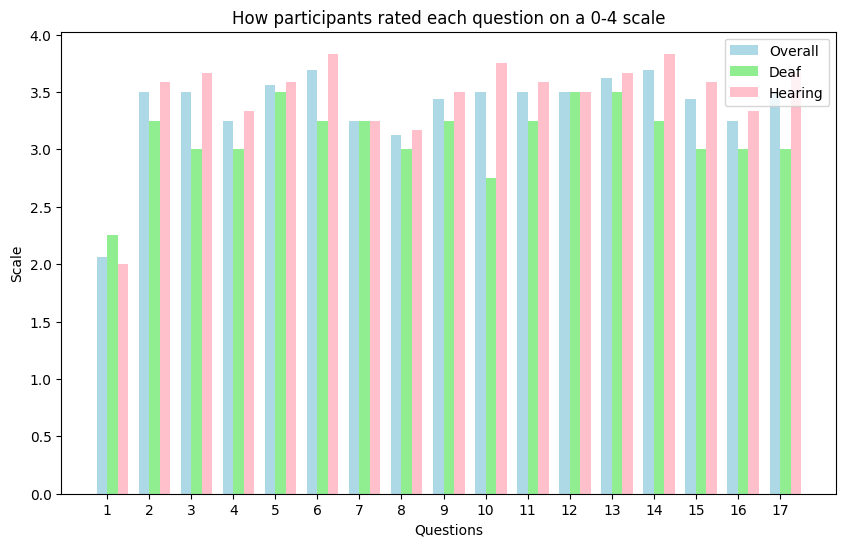

In [278]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.25

# Define the positions for each group of bars
bar_positions_overall = np.arange(len(totals_overall))
bar_positions_deaf = bar_positions_overall + bar_width
bar_positions_hearing = bar_positions_deaf + bar_width

# Define custom colors for each series
color_overall = 'lightblue'
color_deaf = 'lightgreen'
color_hearing = 'pink'

# Plot each series separately, adjusting the positions and specifying colors
plt.bar(bar_positions_overall, totals_overall, width=bar_width, label='Overall', color=color_overall)
plt.bar(bar_positions_deaf, totals_deaf, width=bar_width, label='Deaf', color=color_deaf)
plt.bar(bar_positions_hearing, totals_hearing, width=bar_width, label='Hearing', color=color_hearing)

plt.xlabel('Questions')
plt.ylabel('Scale')
plt.title('How participants rated each question on a 0-4 scale')
plt.xticks(bar_positions_overall + bar_width / 2, labels=range(1, 18))  # Assuming you have x-axis labels
plt.legend()

plt.show()


In [316]:
deviation_hearing = abs(totals_overall - totals_hearing)
print(deviation_hearing.max())
deviation_hearing

0.25


1     0.062500
2     0.083333
3     0.166667
4     0.083333
5     0.020833
6     0.145833
7     0.000000
8     0.041667
9     0.062500
10    0.250000
11    0.083333
12    0.000000
13    0.041667
14    0.145833
15    0.145833
16    0.083333
17    0.166667
Name: totals, dtype: float64

In [317]:
deviation_deaf = abs(totals_overall - totals_deaf)
print(deviation_deaf.max())
deviation_deaf

0.75


1     0.1875
2     0.2500
3     0.5000
4     0.2500
5     0.0625
6     0.4375
7     0.0000
8     0.1250
9     0.1875
10    0.7500
11    0.2500
12    0.0000
13    0.1250
14    0.4375
15    0.4375
16    0.2500
17    0.5000
Name: totals, dtype: float64

In [319]:
deviation_deaf = abs(totals_hearing - totals_deaf)
print(deviation_deaf.max())
print(deviation_deaf.mean())
deviation_deaf

1.0
0.3725490196078431


1     0.250000
2     0.333333
3     0.666667
4     0.333333
5     0.083333
6     0.583333
7     0.000000
8     0.166667
9     0.250000
10    1.000000
11    0.333333
12    0.000000
13    0.166667
14    0.583333
15    0.583333
16    0.333333
17    0.666667
Name: totals, dtype: float64

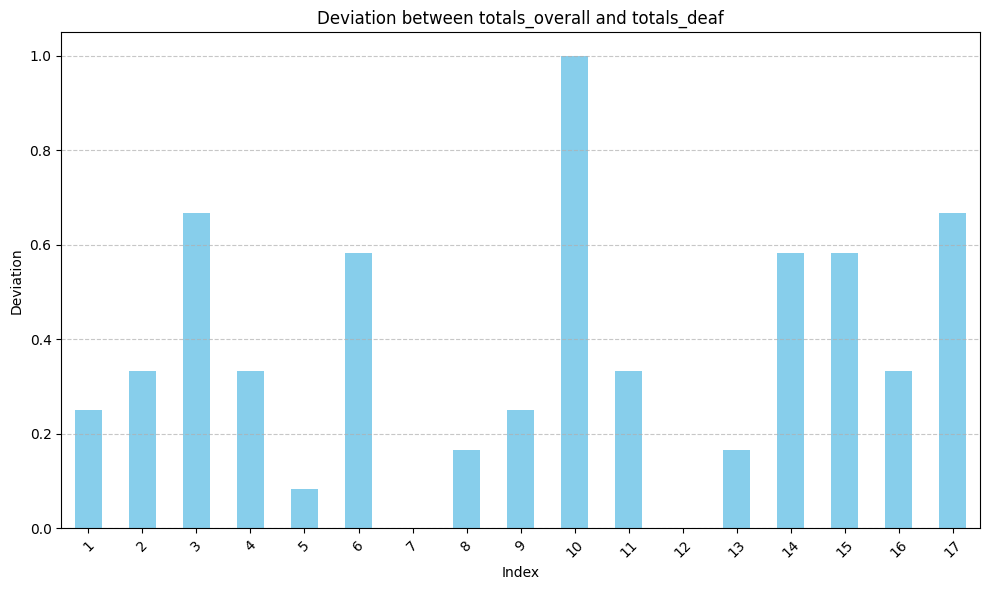

In [321]:
plt.figure(figsize=(10, 6))
deviation_deaf.plot(kind='bar', color='skyblue')
plt.title('Deviation between totals_overall and totals_deaf')
plt.xlabel('Index')
plt.ylabel('Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [305]:
UI_indices = {
    "UI_1": [1],
    "UI_2": [11],
    "UI_3": [5, 6],
    "UI_4": [7, 11],
    "UI_5": [8],
    "UI_6": [9],
    "UI_7": [10]
}

UX_indices = {
    "UX_1": [16],
    "UX_2": [0, 1, 2, 3, 5, 12, 13, 14, 15],
    "UX_3": [7],
    "UX_4": [6, 8],
    "UX_5": [4, 9, 15],
    "UX_6": [9],
    "UX_7": [16]
}

def req(indices, totals):
    averages = []
    for key, indices in indices.items():
        UI_values = [totals[i] for i in indices]
        total = sum(UI_values) 
        average = total / len(indices)
        averages.append(average)
    return averages

In [306]:
UI_overall = req(UI_indices, totals_overall)
UI_deaf = req(UI_indices, totals_deaf)
UI_hearing = req(UI_indices, totals_hearing)

print(UI_overall)
print(UI_deaf)
print(UI_hearing)

[3.5, 3.5, 3.46875, 3.3125, 3.4375, 3.5, 3.5]
[3.25, 3.5, 3.25, 3.25, 3.25, 2.75, 3.25]
[3.583333333333333, 3.5, 3.5416666666666665, 3.3333333333333335, 3.5, 3.75, 3.583333333333333]


/var/folders/9f/klg5bscx2vq918ql3skxc8lm0000gq/T/ipykernel_95539/2984839834.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  UI_values = [totals[i] for i in indices]


In [307]:
UX_overall = req(UX_indices, totals_overall)
UX_deaf = req(UX_indices, totals_deaf)
UX_hearing = req(UX_indices, totals_hearing)

print(UX_overall)
print(UX_deaf)
print(UX_hearing)

[3.5, 3.3333333333333335, 3.125, 3.34375, 3.4375, 3.5, 3.5]
[3.0, 3.0555555555555554, 3.0, 3.25, 3.0833333333333335, 2.75, 3.0]
[3.666666666666667, 3.4259259259259256, 3.166666666666667, 3.375, 3.5555555555555554, 3.75, 3.666666666666667]


/var/folders/9f/klg5bscx2vq918ql3skxc8lm0000gq/T/ipykernel_95539/2984839834.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  UI_values = [totals[i] for i in indices]


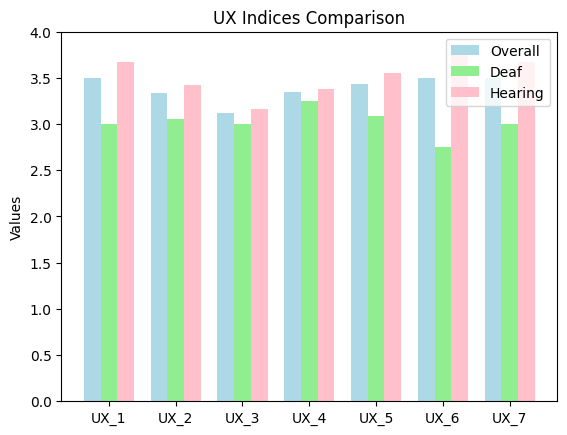

In [308]:
N = len(UX_overall)

# Indices for the x-axis
ind = np.arange(N)

# Width of each bar
width = 0.25

color_overall = 'lightblue'
color_deaf = 'lightgreen'
color_hearing = 'pink'

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(ind, UX_overall, width, label='Overall', color=color_overall)
rects2 = ax.bar(ind + width, UX_deaf, width, label='Deaf', color=color_deaf)
rects3 = ax.bar(ind + 2*width, UX_hearing, width, label='Hearing', color=color_hearing)

# Adding labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('UX Indices Comparison')
ax.set_xticks(ind + width)
ax.set_xticklabels(UX_indices.keys())
ax.legend()

ax.set_ylim(0, 4)

plt.show()


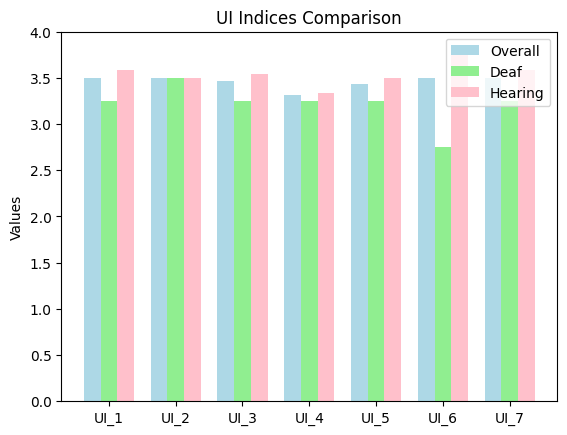

In [309]:
N = len(UI_overall)

# Indices for the x-axis
ind = np.arange(N)

# Width of each bar
width = 0.25

color_overall = 'lightblue'
color_deaf = 'lightgreen'
color_hearing = 'pink'

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(ind, UI_overall, width, label='Overall', color=color_overall)
rects2 = ax.bar(ind + width, UI_deaf, width, label='Deaf', color=color_deaf)
rects3 = ax.bar(ind + 2*width, UI_hearing, width, label='Hearing', color=color_hearing)

# Adding labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('UI Indices Comparison')
ax.set_xticks(ind + width)
ax.set_xticklabels(UI_indices.keys())
ax.legend()

ax.set_ylim(0, 4)

plt.show()


In [337]:
combined_overall = UI_overall.copy()
combined_overall.extend(UX_overall)

combined_deaf = UI_deaf.copy()
combined_deaf.extend(UX_deaf)

combined_hearing = UI_hearing.copy()
combined_hearing.extend(UX_hearing)

mean_value = sum(combined_hearing) / len(combined_hearing)
print("Mean calculated manually:", mean_value)

mean_value = sum(combined_deaf) / len(combined_deaf)
print("Mean calculated manually:", mean_value)

print(combined_deaf)

Mean calculated manually: 3.528439153439153
Mean calculated manually: 3.1170634920634925
[3.25, 3.5, 3.25, 3.25, 3.25, 2.75, 3.25, 3.0, 3.0555555555555554, 3.0, 3.25, 3.0833333333333335, 2.75, 3.0]


In [327]:
combined_keys = list(UI_indices.keys()) + list(UX_indices.keys())

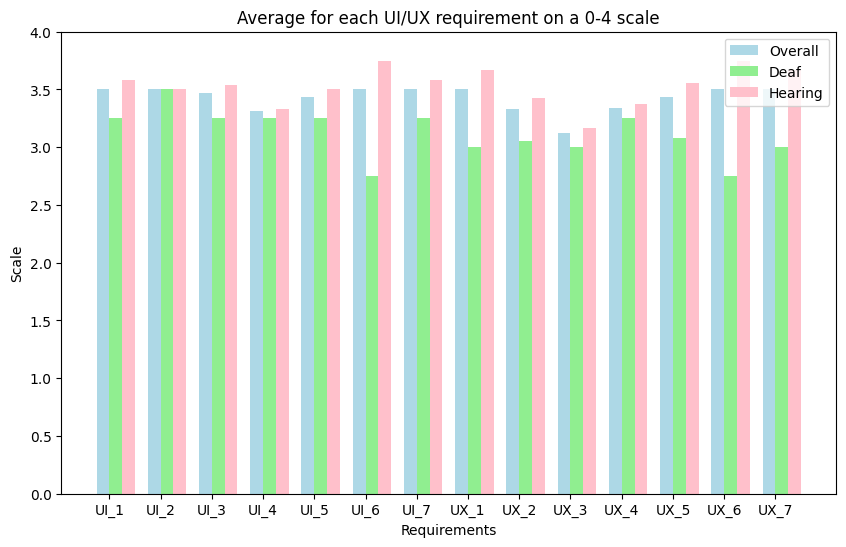

In [312]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.25

# Define the positions for each group of bars
bar_positions_overall = np.arange(len(combined_overall))
bar_positions_deaf = bar_positions_overall + bar_width
bar_positions_hearing = bar_positions_deaf + bar_width

# Define custom colors for each series
color_overall = 'lightblue'
color_deaf = 'lightgreen'
color_hearing = 'pink'

# Plot each series separately, adjusting the positions and specifying colors
plt.bar(bar_positions_overall, combined_overall, width=bar_width, label='Overall', color=color_overall)
plt.bar(bar_positions_deaf, combined_deaf, width=bar_width, label='Deaf', color=color_deaf)
plt.bar(bar_positions_hearing, combined_hearing, width=bar_width, label='Hearing', color=color_hearing)

plt.xlabel('Requirements')
plt.ylabel('Scale')
plt.title('Average for each UI/UX requirement on a 0-4 scale')
plt.xticks(bar_positions_overall + bar_width / 2, labels=combined_keys)  # Assuming you have x-axis labels
plt.legend()

plt.ylim(0, 4) 

plt.show()


In [323]:
combined_hearing_df = pd.DataFrame(combined_hearing)
combined_deaf_df = pd.DataFrame(combined_deaf)

# Calculate deviation
deviation_UIX = abs(combined_hearing_df - combined_deaf_df)

# Print maximum and mean deviation
print(deviation_UIX.max())
print(deviation_UIX.mean())
print(deviation_UIX)

0    1.0
dtype: float64
0    0.411376
dtype: float64
           0
0   0.333333
1   0.000000
2   0.291667
3   0.083333
4   0.250000
5   1.000000
6   0.333333
7   0.666667
8   0.370370
9   0.166667
10  0.125000
11  0.472222
12  1.000000
13  0.666667


<Figure size 1000x600 with 0 Axes>

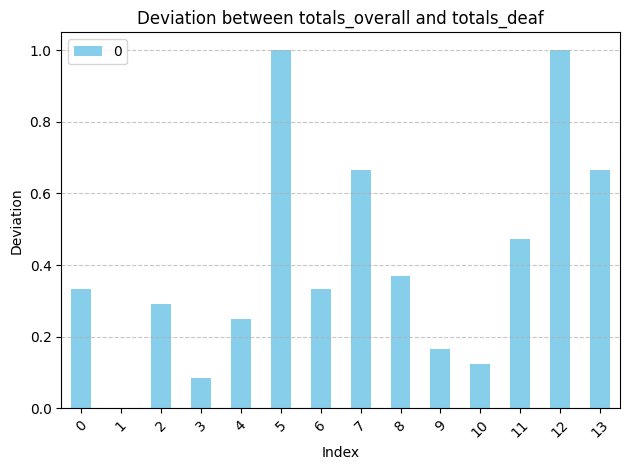

In [324]:
plt.figure(figsize=(10, 6))
deviation_UIX.plot(kind='bar', color='skyblue')
plt.title('Deviation between totals_overall and totals_deaf')
plt.xlabel('Index')
plt.ylabel('Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
df_SUS_eval = df_eval_clean.iloc[:, 26:43]
df_SUS_eval = df_SUS_eval.dropna()
df_SUS_eval

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5.0,2.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,5.0
1,3.0,2.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0
2,2.0,1.0,4.0,4.0,3.0,4.0,4.0,5.0,5.0,4.0,3.0,2.0,4.0,1.0,3.0,3.0,4.0
3,4.0,1.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,4.0,2.0,5.0,1.0,5.0
4,5.0,1.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0
5,4.0,1.0,5.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,1.0,5.0,2.0,5.0
6,1.0,2.0,5.0,3.0,1.0,5.0,5.0,4.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0
8,3.0,2.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,3.0,3.0,4.0,4.0,2.0,5.0,3.0,2.0,2.0,5.0,5.0,3.0,3.0,2.0,5.0,2.0,4.0
10,2.0,1.0,5.0,5.0,1.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,4.0,2.0,4.0


In [20]:
def calculate_score(row):
    score = 0
    for i, value in enumerate(row):
        if i in [0,2,3,5,6,7,8,9,10,12,14,16]:  
            score += value - 1
        elif i in [1,4,11,13,15]:
            score += 5 - value
    score = score * 2.5
    return score

# Apply the scoring function to each row in the DataFrame
df_SUS_eval['SUS Score'] = df_SUS_eval.apply(calculate_score, axis=1)
average_sus_eval_score = df_SUS_eval['SUS Score'].mean()

print("Average SUS Score:", average_sus_eval_score)
print(df_SUS_eval)


Average SUS Score: 143.4375
      1    2    3    4    5    6    7    8    9   10   11   12   13   14   15  \
0   5.0  2.0  5.0  5.0  1.0  5.0  5.0  5.0  5.0  4.0  5.0  1.0  5.0  1.0  4.0   
1   3.0  2.0  4.0  4.0  1.0  5.0  5.0  5.0  5.0  5.0  5.0  1.0  5.0  1.0  4.0   
2   2.0  1.0  4.0  4.0  3.0  4.0  4.0  5.0  5.0  4.0  3.0  2.0  4.0  1.0  3.0   
3   4.0  1.0  4.0  4.0  1.0  5.0  5.0  5.0  5.0  5.0  5.0  1.0  4.0  2.0  5.0   
4   5.0  1.0  5.0  5.0  3.0  5.0  5.0  5.0  5.0  4.0  5.0  1.0  5.0  1.0  5.0   
5   4.0  1.0  5.0  5.0  1.0  5.0  5.0  4.0  5.0  5.0  5.0  4.0  5.0  1.0  5.0   
6   1.0  2.0  5.0  3.0  1.0  5.0  5.0  4.0  4.0  5.0  5.0  1.0  5.0  1.0  5.0   
8   3.0  2.0  3.0  3.0  1.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0   
9   3.0  3.0  4.0  4.0  2.0  5.0  3.0  2.0  2.0  5.0  5.0  3.0  3.0  2.0  5.0   
10  2.0  1.0  5.0  5.0  1.0  5.0  4.0  5.0  5.0  5.0  5.0  1.0  5.0  1.0  4.0   
11  3.0  1.0  4.0  4.0  1.0  5.0  3.0  3.0  5.0  5.0  4.0  1.0  5.0  1.0  5.0   


In [21]:
df_SUS_eval_survey = df_eval_clean.iloc[:, 26:43]
df_SUS_eval_survey = df_SUS_eval_survey.dropna()
df_SUS_eval_survey = df_SUS_eval_survey.drop(['4','7','8','10','11'], axis=1)
df_SUS_eval_survey

,1,2,3,5,6,9,12,13,14,15,16,17
0,5.0,2.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,4.0,2.0,5.0
1,3.0,2.0,4.0,1.0,5.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0
2,2.0,1.0,4.0,3.0,4.0,5.0,2.0,4.0,1.0,3.0,3.0,4.0
3,4.0,1.0,4.0,1.0,5.0,5.0,1.0,4.0,2.0,5.0,1.0,5.0
4,5.0,1.0,5.0,3.0,5.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0
5,4.0,1.0,5.0,1.0,5.0,5.0,4.0,5.0,1.0,5.0,2.0,5.0
6,1.0,2.0,5.0,1.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,5.0
8,3.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,3.0,3.0,4.0,2.0,5.0,2.0,3.0,3.0,2.0,5.0,2.0,4.0
10,2.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,4.0,2.0,4.0


In [22]:
def calculate_score_survey(row):
    score = 0
    for i, value in enumerate(row):
        if i in [0,2,4,5,7,9,11]:  
            score += value - 1
        elif i in [1,3,6,8,10]:
            score += 5 - value
    score = score * 2.5
    return score

df_SUS_eval_survey['SUS Score'] = df_SUS_eval_survey.apply(calculate_score_survey, axis=1)
average_sus_eval_survey_score = df_SUS_eval_survey['SUS Score'].mean()

print("Average SUS Score:", average_sus_eval_survey_score)
print(df_SUS_eval_survey)

Average SUS Score: 101.875
      1    2    3    5    6    9   12   13   14   15   16   17  SUS Score
0   5.0  2.0  5.0  1.0  5.0  5.0  1.0  5.0  1.0  4.0  2.0  5.0      112.5
1   3.0  2.0  4.0  1.0  5.0  5.0  1.0  5.0  1.0  4.0  1.0  4.0      105.0
2   2.0  1.0  4.0  3.0  4.0  5.0  2.0  4.0  1.0  3.0  3.0  4.0       85.0
3   4.0  1.0  4.0  1.0  5.0  5.0  1.0  4.0  2.0  5.0  1.0  5.0      110.0
4   5.0  1.0  5.0  3.0  5.0  5.0  1.0  5.0  1.0  5.0  3.0  5.0      110.0
5   4.0  1.0  5.0  1.0  5.0  5.0  4.0  5.0  1.0  5.0  2.0  5.0      107.5
6   1.0  2.0  5.0  1.0  5.0  4.0  1.0  5.0  1.0  5.0  1.0  5.0      105.0
8   3.0  2.0  3.0  1.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0       67.5
9   3.0  3.0  4.0  2.0  5.0  2.0  3.0  3.0  2.0  5.0  2.0  4.0       80.0
10  2.0  1.0  5.0  1.0  5.0  5.0  1.0  5.0  1.0  4.0  2.0  4.0      105.0
11  3.0  1.0  4.0  1.0  5.0  5.0  1.0  5.0  1.0  5.0  1.0  5.0      112.5
12  2.0  2.0  4.0  1.0  4.0  4.0  1.0  5.0  2.0  4.0  1.0  4.0       95.0
13  4.0  2.

In [23]:
df_other_hearing_loss = df_eval_clean[df_eval_clean['hearing_loss'] != 'No hearing loss']
df_SUS_eval_deaf = df_other_hearing_loss.iloc[:, 26:43]
df_SUS_eval_deaf = df_SUS_eval_deaf.dropna()
df_SUS_eval_deaf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,3.0,2.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0
4,5.0,1.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0
8,3.0,2.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
12,2.0,2.0,4.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,4.0,1.0,5.0,2.0,4.0,1.0,4.0


In [24]:
df_SUS_eval_deaf['SUS Score'] = df_SUS_eval_deaf.apply(calculate_score, axis=1)
average_sus_eval_deaf_score = df_SUS_eval_deaf['SUS Score'].mean()

print("Average SUS Score:", average_sus_eval_deaf_score)
print(df_SUS_eval_deaf)

Average SUS Score: 132.5
      1    2    3    4    5    6    7    8    9   10   11   12   13   14   15  \
1   3.0  2.0  4.0  4.0  1.0  5.0  5.0  5.0  5.0  5.0  5.0  1.0  5.0  1.0  4.0   
4   5.0  1.0  5.0  5.0  3.0  5.0  5.0  5.0  5.0  4.0  5.0  1.0  5.0  1.0  5.0   
8   3.0  2.0  3.0  3.0  1.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0   
12  2.0  2.0  4.0  4.0  1.0  4.0  4.0  3.0  4.0  3.0  4.0  1.0  5.0  2.0  4.0   

     16   17  SUS Score  
1   1.0  4.0      152.5  
4   3.0  5.0      157.5  
8   3.0  3.0       92.5  
12  1.0  4.0      127.5  


In [25]:
df_other_hearing_loss = df_eval_clean[df_eval_clean['hearing_loss'] != 'No hearing loss']
df_SUS_eval_deaf_survey = df_other_hearing_loss.iloc[:, 26:43]
df_SUS_eval_deaf_survey = df_SUS_eval_deaf_survey.dropna()
df_SUS_eval_deaf_survey = df_SUS_eval_deaf_survey.drop(['4','7','8','10','11'], axis=1)
df_SUS_eval_deaf_survey

,1,2,3,5,6,9,12,13,14,15,16,17
1,3.0,2.0,4.0,1.0,5.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0
4,5.0,1.0,5.0,3.0,5.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0
8,3.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
12,2.0,2.0,4.0,1.0,4.0,4.0,1.0,5.0,2.0,4.0,1.0,4.0


In [26]:
df_SUS_eval_deaf_survey['SUS Score'] = df_SUS_eval_deaf_survey.apply(calculate_score_survey, axis=1)
average_sus_eval_survey_score = df_SUS_eval_deaf_survey['SUS Score'].mean()

print("Average SUS Score:", average_sus_eval_survey_score)
print(df_SUS_eval_deaf_survey)

Average SUS Score: 94.375
      1    2    3    5    6    9   12   13   14   15   16   17  SUS Score
1   3.0  2.0  4.0  1.0  5.0  5.0  1.0  5.0  1.0  4.0  1.0  4.0      105.0
4   5.0  1.0  5.0  3.0  5.0  5.0  1.0  5.0  1.0  5.0  3.0  5.0      110.0
8   3.0  2.0  3.0  1.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0       67.5
12  2.0  2.0  4.0  1.0  4.0  4.0  1.0  5.0  2.0  4.0  1.0  4.0       95.0


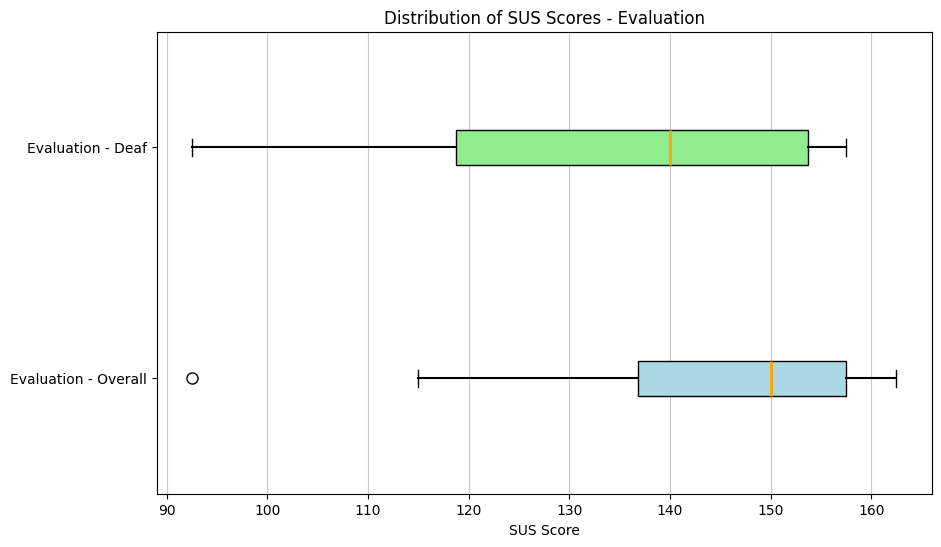

In [72]:
plt.figure(figsize=(10, 6))

plt.boxplot(df_SUS_eval['SUS Score'], positions=[0], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

plt.boxplot(df_SUS_eval_deaf['SUS Score'], positions=[1], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Adjust x-axis labels
plt.yticks([0, 1], ['Evaluation - Overall', 'Evaluation - Deaf'])

# Set labels and title
plt.xlabel('SUS Score')
plt.title('Distribution of SUS Scores - Evaluation')
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()


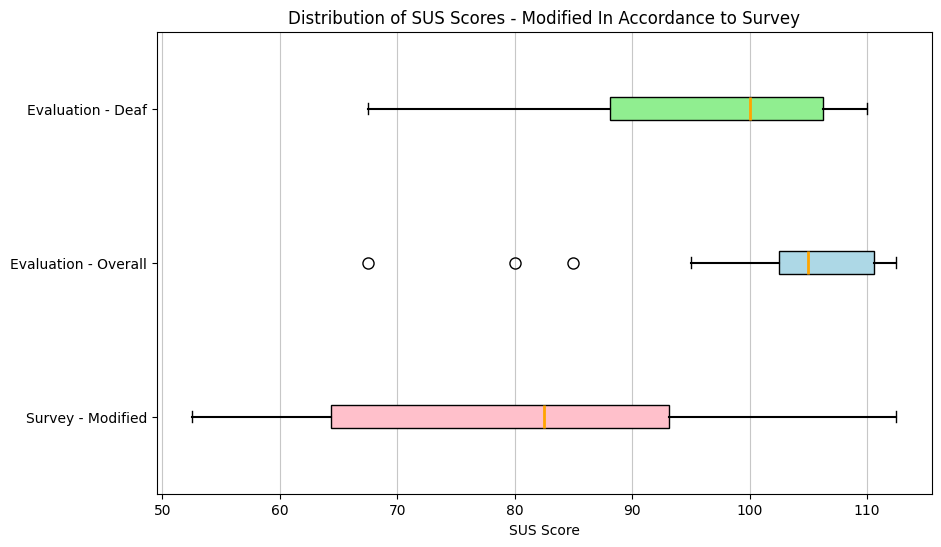

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# First box plot
plt.boxplot(df_SUS['SUS Score'], positions=[0], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='pink', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Second box plot
plt.boxplot(df_SUS_eval_survey['SUS Score'], positions=[1], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

plt.boxplot(df_SUS_eval_deaf_survey['SUS Score'], positions=[2], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Adjust x-axis labels
plt.yticks([0, 1, 2], ['Survey - Modified', 'Evaluation - Overall', 'Evaluation - Deaf'])

# Set labels and title
plt.xlabel('SUS Score')
plt.title('Distribution of SUS Scores - Modified In Accordance to Survey')
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()


In [29]:
df_SUS_eval_clean = df_eval_clean.iloc[:, 26:43]
df_SUS_eval_clean = df_SUS_eval_clean.dropna()
df_SUS_eval_clean = df_SUS_eval_clean.drop(['4','7','8','9','10','11','17'], axis=1)
df_SUS_eval_clean

,1,2,3,5,6,12,13,14,15,16
0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,1.0,4.0,2.0
1,3.0,2.0,4.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0
2,2.0,1.0,4.0,3.0,4.0,2.0,4.0,1.0,3.0,3.0
3,4.0,1.0,4.0,1.0,5.0,1.0,4.0,2.0,5.0,1.0
4,5.0,1.0,5.0,3.0,5.0,1.0,5.0,1.0,5.0,3.0
5,4.0,1.0,5.0,1.0,5.0,4.0,5.0,1.0,5.0,2.0
6,1.0,2.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
8,3.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
9,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,5.0,2.0
10,2.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,4.0,2.0


In [30]:
df_SUS_eval_clean['SUS Score'] = df_SUS_eval_clean.apply(calculate_SUS_score, axis=1)
average_sus_eval_clean_score = df_SUS_eval_clean['SUS Score'].mean()

print("Average SUS Score:", average_sus_eval_clean_score)
print(df_SUS_eval_clean)

Average SUS Score: 75.625
      1    2    3    5    6   12   13   14   15   16  SUS Score
0   5.0  2.0  5.0  1.0  5.0  1.0  5.0  1.0  4.0  2.0       82.5
1   3.0  2.0  4.0  1.0  5.0  1.0  5.0  1.0  4.0  1.0       77.5
2   2.0  1.0  4.0  3.0  4.0  2.0  4.0  1.0  3.0  3.0       62.5
3   4.0  1.0  4.0  1.0  5.0  1.0  4.0  2.0  5.0  1.0       80.0
4   5.0  1.0  5.0  3.0  5.0  1.0  5.0  1.0  5.0  3.0       85.0
5   4.0  1.0  5.0  1.0  5.0  4.0  5.0  1.0  5.0  2.0       77.5
6   1.0  2.0  5.0  1.0  5.0  1.0  5.0  1.0  5.0  1.0       77.5
8   3.0  2.0  3.0  1.0  3.0  3.0  3.0  3.0  3.0  3.0       47.5
9   3.0  3.0  4.0  2.0  5.0  3.0  3.0  2.0  5.0  2.0       62.5
10  2.0  1.0  5.0  1.0  5.0  1.0  5.0  1.0  4.0  2.0       77.5
11  3.0  1.0  4.0  1.0  5.0  1.0  5.0  1.0  5.0  1.0       82.5
12  2.0  2.0  4.0  1.0  4.0  1.0  5.0  2.0  4.0  1.0       70.0
13  4.0  2.0  5.0  1.0  4.0  1.0  5.0  1.0  5.0  1.0       82.5
14  3.0  1.0  5.0  2.0  5.0  1.0  5.0  1.0  5.0  1.0       85.0
15  2.0  1.0  

In [31]:
df_other_hearing_loss = df_eval_clean[df_eval_clean['hearing_loss'] != 'No hearing loss']
df_SUS_eval_deaf_clean = df_other_hearing_loss.iloc[:, 26:43]
df_SUS_eval_deaf_clean = df_SUS_eval_deaf_clean.dropna()
df_SUS_eval_deaf_clean = df_SUS_eval_deaf_clean.drop(['4','7','8','9','10','11','17'], axis=1)
df_SUS_eval_deaf_clean

,1,2,3,5,6,12,13,14,15,16
1,3.0,2.0,4.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0
4,5.0,1.0,5.0,3.0,5.0,1.0,5.0,1.0,5.0,3.0
8,3.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
12,2.0,2.0,4.0,1.0,4.0,1.0,5.0,2.0,4.0,1.0


In [32]:
df_SUS_eval_deaf_clean['SUS Score'] = df_SUS_eval_deaf_clean.apply(calculate_SUS_score, axis=1)
average_sus_eval_deaf_clean_score = df_SUS_eval_deaf_clean['SUS Score'].mean()

print("Average SUS Score:", average_sus_eval_deaf_clean_score)
print(df_SUS_eval_deaf_clean)

Average SUS Score: 70.0
      1    2    3    5    6   12   13   14   15   16  SUS Score
1   3.0  2.0  4.0  1.0  5.0  1.0  5.0  1.0  4.0  1.0       77.5
4   5.0  1.0  5.0  3.0  5.0  1.0  5.0  1.0  5.0  3.0       85.0
8   3.0  2.0  3.0  1.0  3.0  3.0  3.0  3.0  3.0  3.0       47.5
12  2.0  2.0  4.0  1.0  4.0  1.0  5.0  2.0  4.0  1.0       70.0


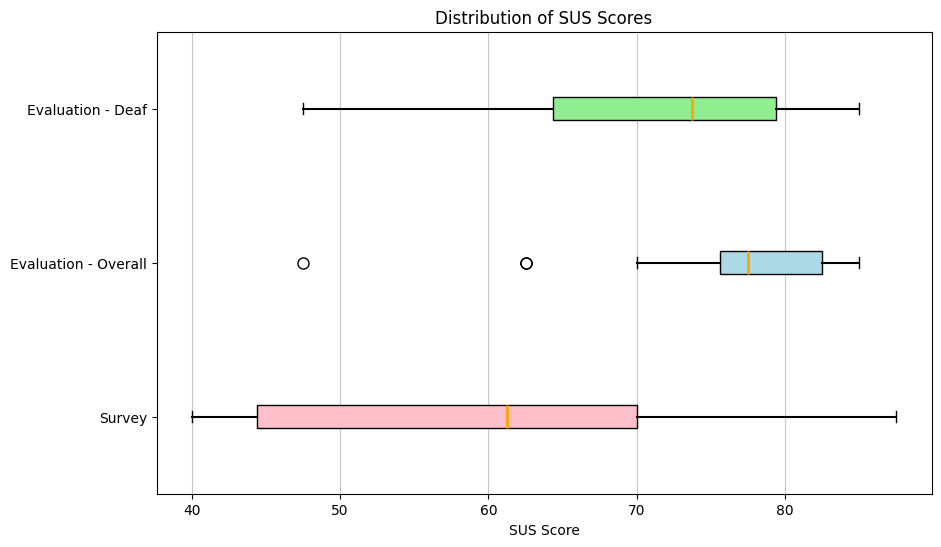

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# First box plot
plt.boxplot(df_SUS_clean['SUS Score'], positions=[0], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='pink', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Second box plot
plt.boxplot(df_SUS_eval_clean['SUS Score'], positions=[1], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

plt.boxplot(df_SUS_eval_deaf_clean['SUS Score'], positions=[2], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Adjust x-axis labels
plt.yticks([0, 1, 2], ['Survey', 'Evaluation - Overall', 'Evaluation - Deaf'])

# Set labels and title
plt.xlabel('SUS Score')
plt.title('Distribution of SUS Scores')
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()


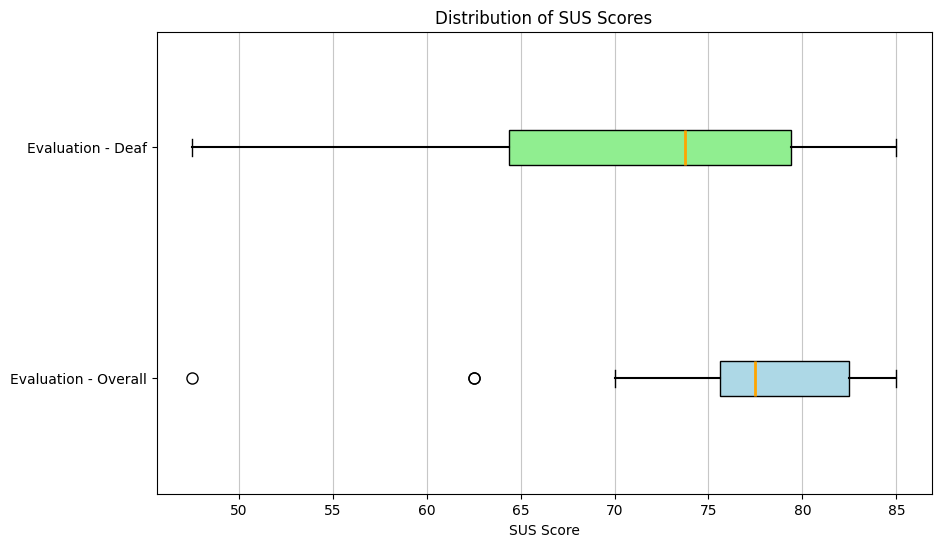

In [34]:
plt.figure(figsize=(10, 6))

plt.boxplot(df_SUS_eval_clean['SUS Score'], positions=[0], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

plt.boxplot(df_SUS_eval_deaf_clean['SUS Score'], positions=[1], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Adjust x-axis labels
plt.yticks([0, 1], ['Evaluation - Overall', 'Evaluation - Deaf'])

# Set labels and title
plt.xlabel('SUS Score')
plt.title('Distribution of SUS Scores')
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()
